
# Basic example

We demonstrate how to use ``GGLasso`` for a SGL problem. 
First, we generate a sparse Erdos-Renyi network of 20 nodes. We generate an according precision matrix and sample from it. Here, we use a large 
number of samples (N=1000) to demonstrate that it is possible to recover (approximately) the original graph if sufficiently many samples are available.

In many practical applications however, we face the situation of p>N.


In [1]:
# sphinx_gallery_thumbnail_number = 2

from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.problem import glasso_problem
from gglasso.helper.basic_linalg import adjacency_matrix
from estimate_connectivity import estimate_graph_connectivity, printPretty

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

p = 3
N = 200

Sigma, Theta = generate_precision_matrix(p=p, M=1, style='erdos', prob=0.1, seed=1234)

S, sample = sample_covariance_matrix(Sigma, N)

print("Shape of empirical covariance matrix: ", S.shape)
print("Shape of the sample array: ", sample.shape)

Shape of empirical covariance matrix:  (3, 3)
Shape of the sample array:  (3, 200)


## Draw the graph of the true precision matrix.



    0        0        0    
    0        0        1.00 
    0        1.00     0    


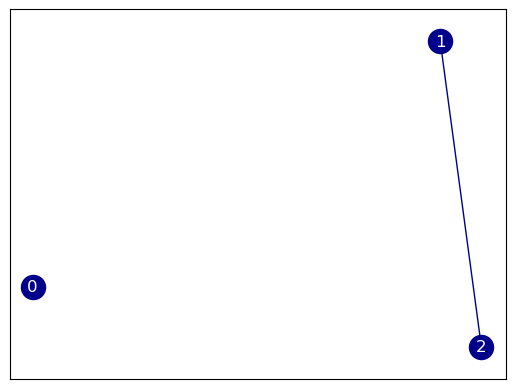

In [2]:
A = adjacency_matrix(Theta)

printPretty(A)

G = nx.from_numpy_array(A)
pos = nx.drawing.layout.spring_layout(G, seed = 1234)

plt.figure()
nx.draw_networkx(G, pos = pos, node_color = "darkblue", edge_color = "darkblue", font_color = 'white', with_labels = True)

Shape of sample array:  (3, 200)
The origional graph data is
    0.50    -0.84    -2.13     0.20     0.44     0.49     1.11    -1.07    -0.05    -1.56    -0.38     0.78    -0.34    -0.16     1.08    -0.50     0.06     1.70    -1.17     2.33     0.07    -0.74     1.34    -2.40     1.60     0.23    -2.26     0.61     0.11     0.33     0.65    -1.47    -0.73     1.05     0.68    -0.61     0.56     0.25     0.01     0.37     0.50    -0.17     0.20    -0.61    -0.55     0.99    -0.21     0.59     0.28    -0.29     0.26     0.73    -0.05    -1.88    -1.89     1.84     0.76     0.24     0.56     1.47    -1.87    -1.11    -0.91     1.53     0.47     0.01    -0.16     1.04    -0.13     0.82    -1.00    -1.31    -1.27    -0.92     0.88     0.66     0.75     0.58    -0.77    -0.55    -1.11     1.00     0.71     1.06    -0.96    -0.99     0.93    -0.14     0.76    -1.14     1.70     1.12    -1.03     0.55     0.92     0.45     0.01    -0.07    -0.33    -1.29     0.90    -0.37    -0.10    -0.33    

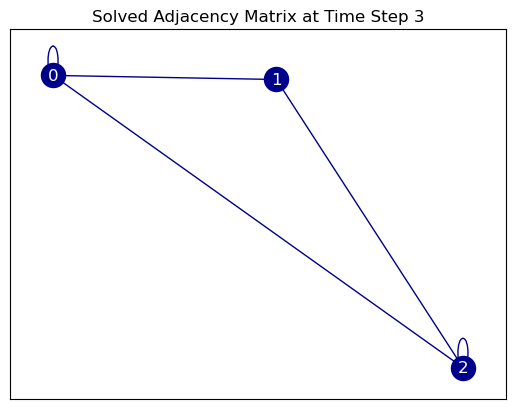

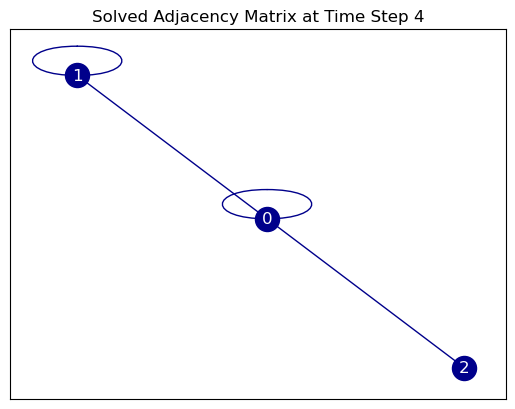

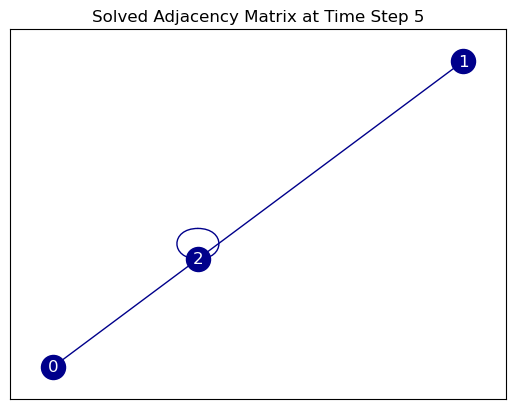

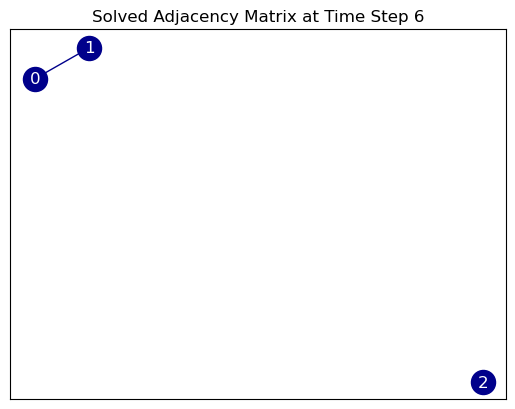

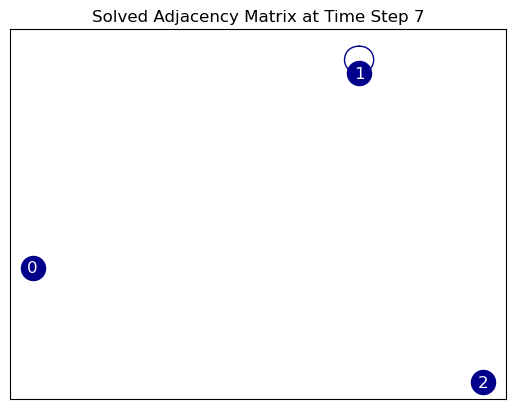

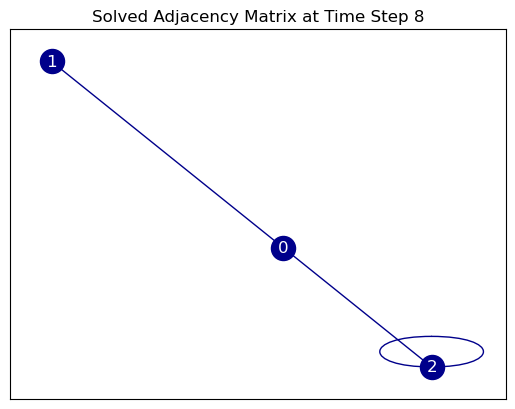

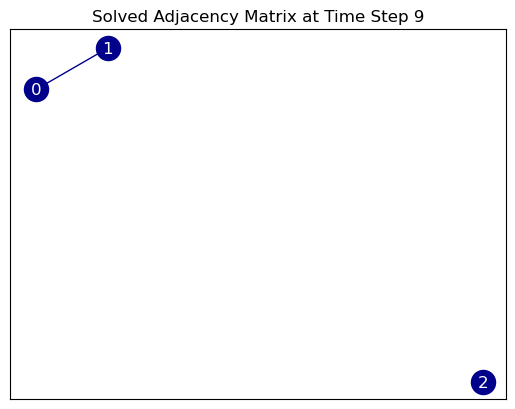

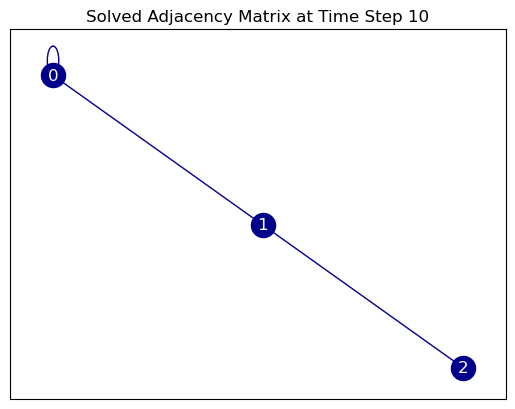

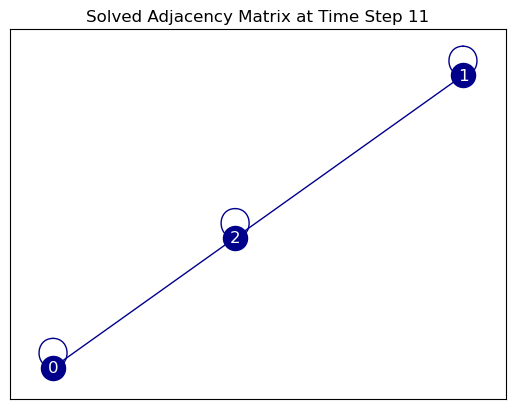

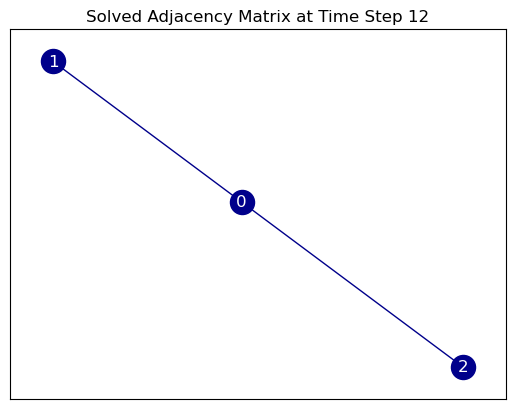

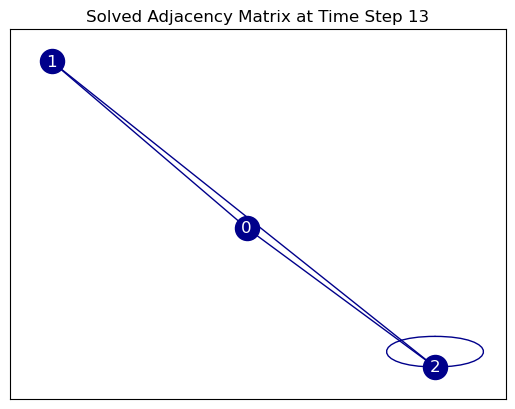

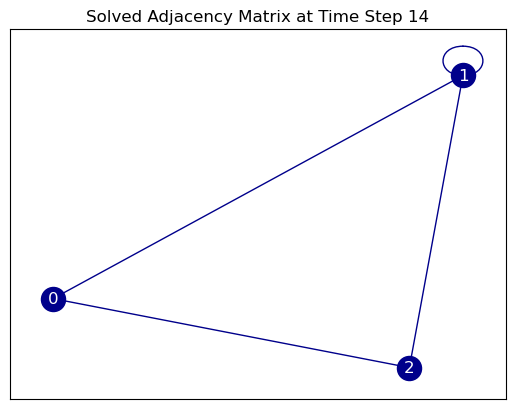

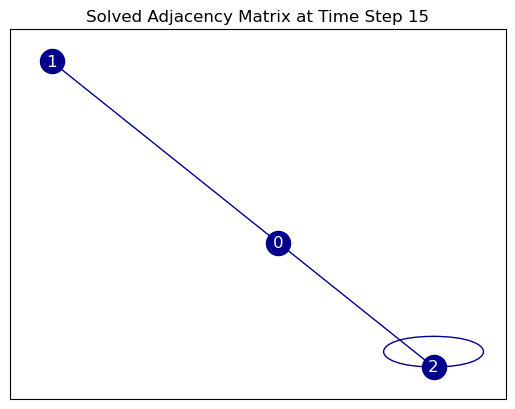

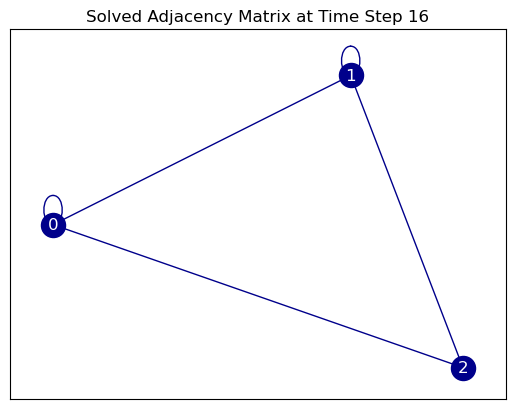

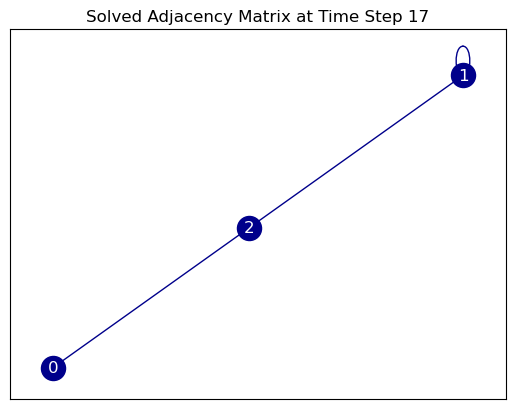

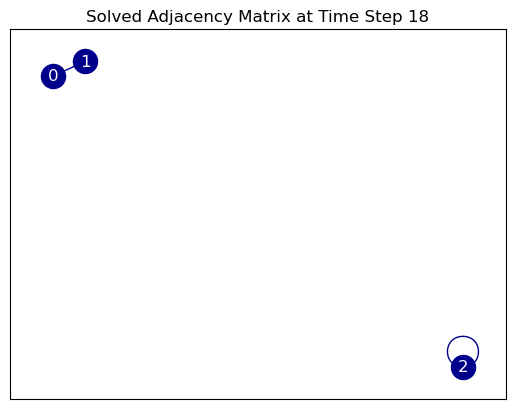

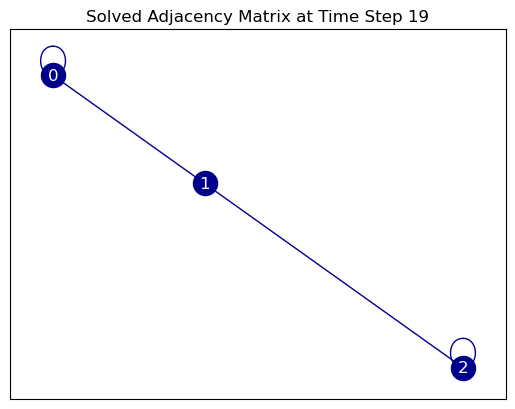

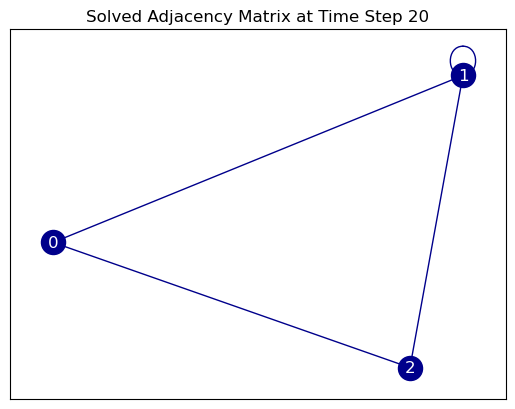

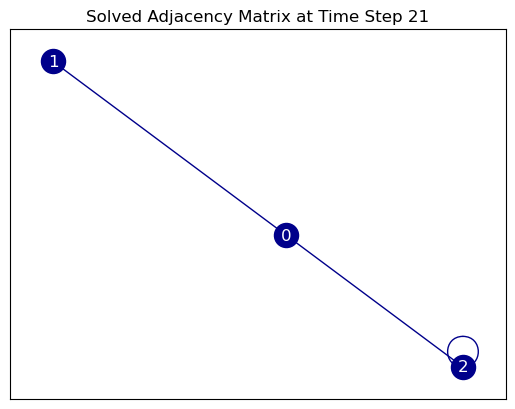

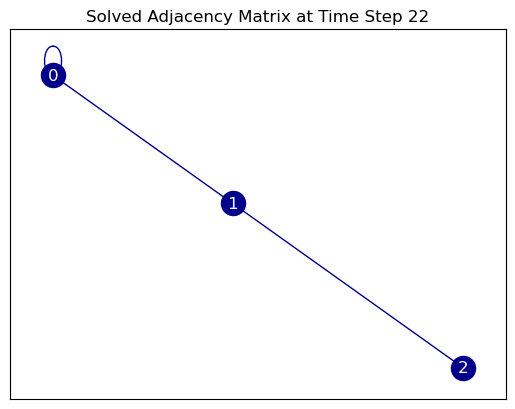

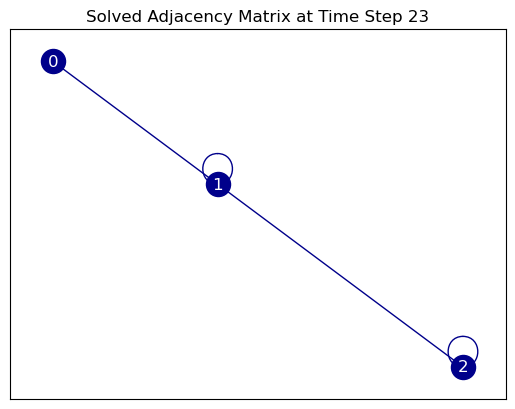

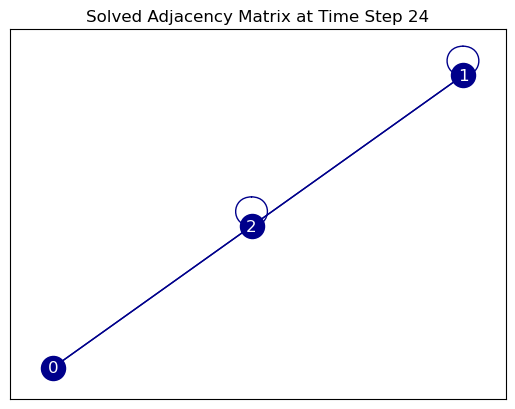

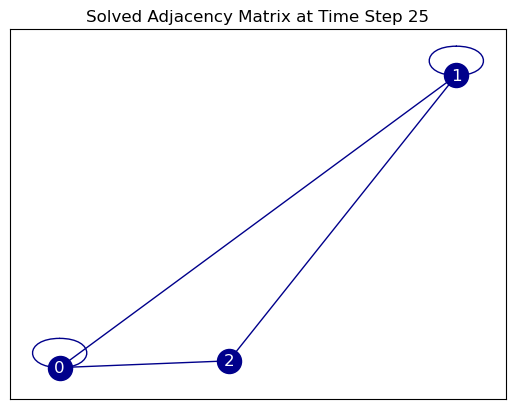

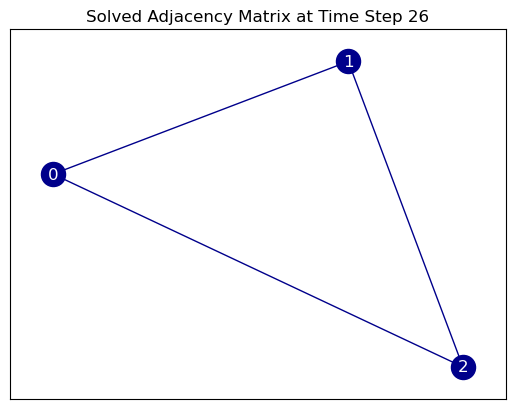

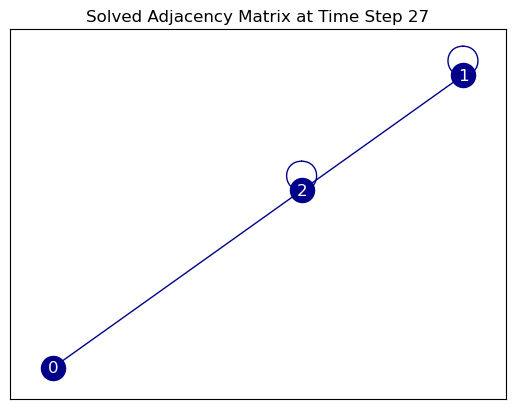

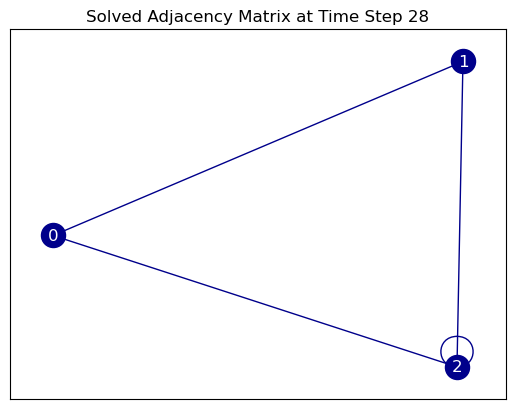

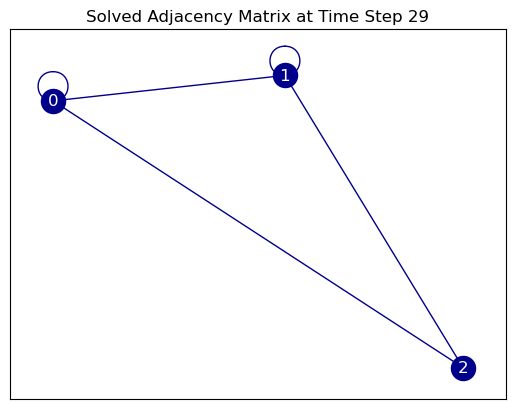

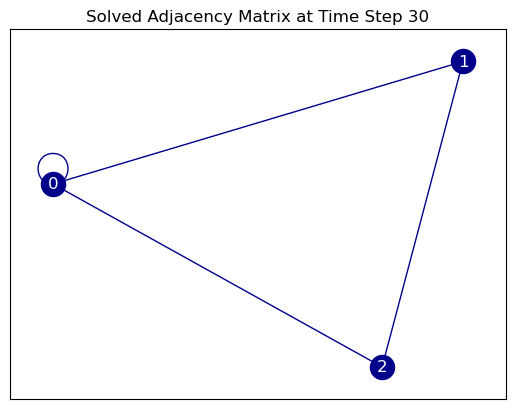

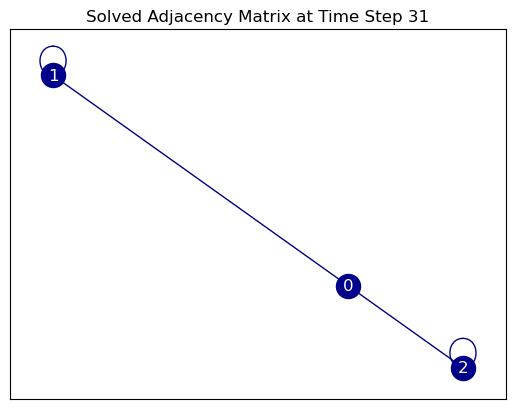

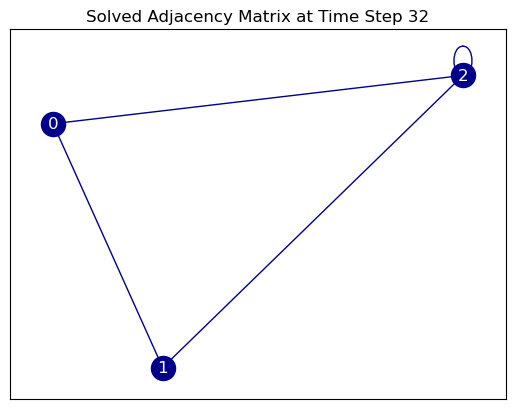

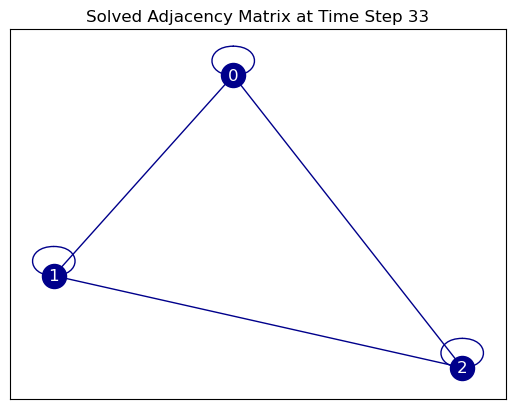

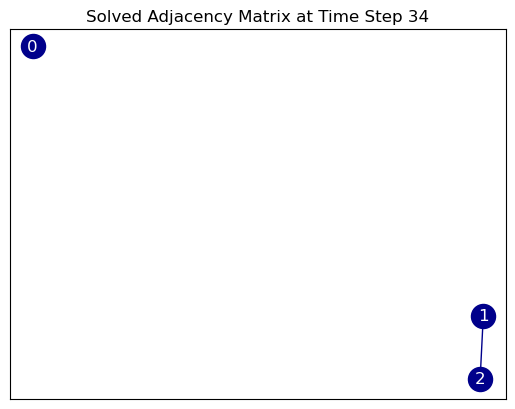

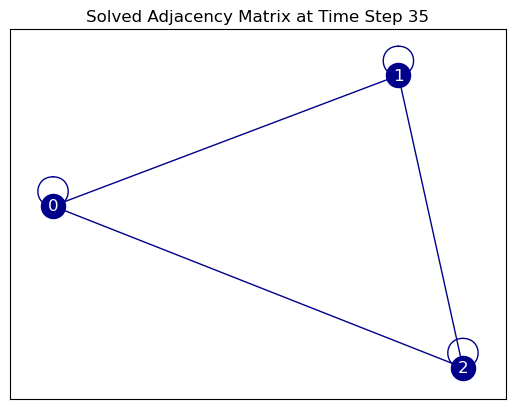

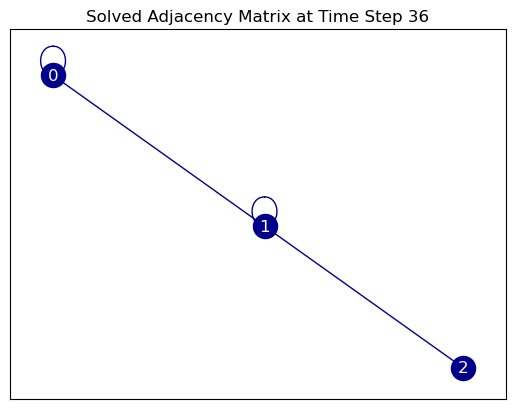

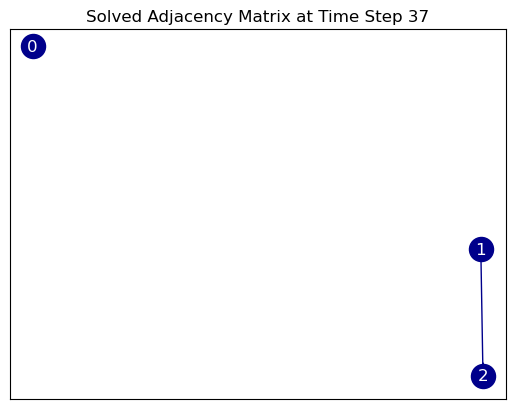

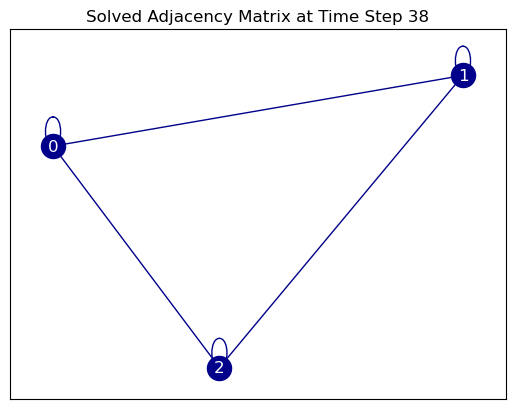

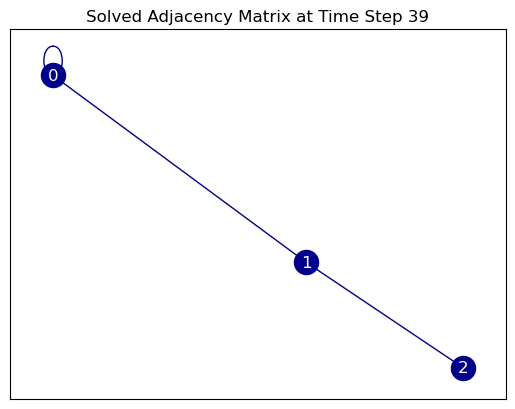

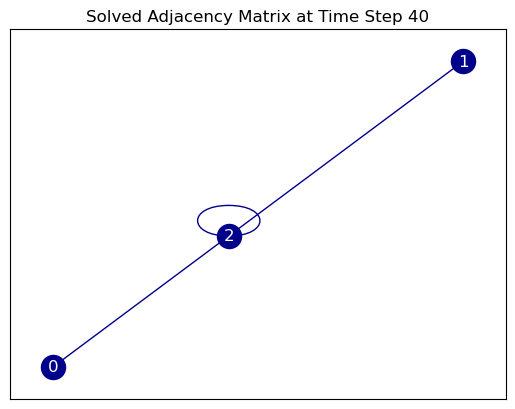

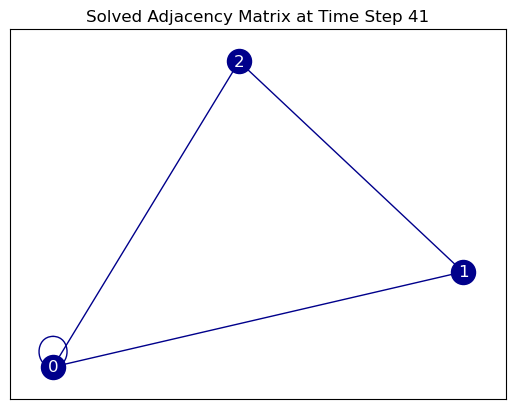

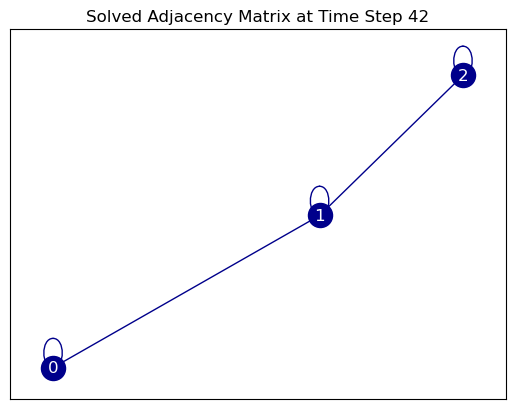

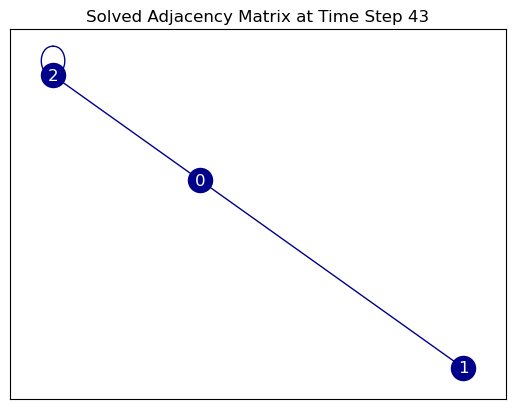

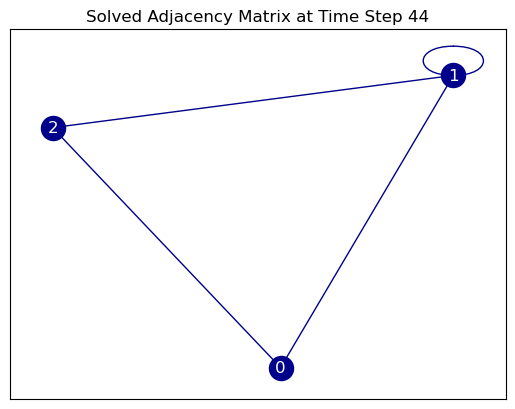

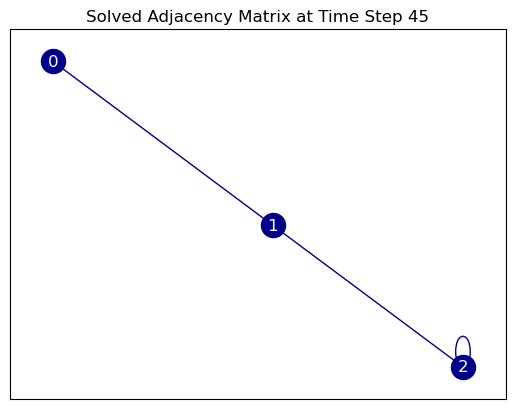

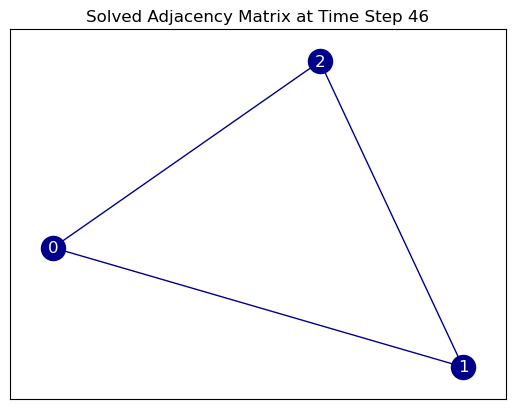

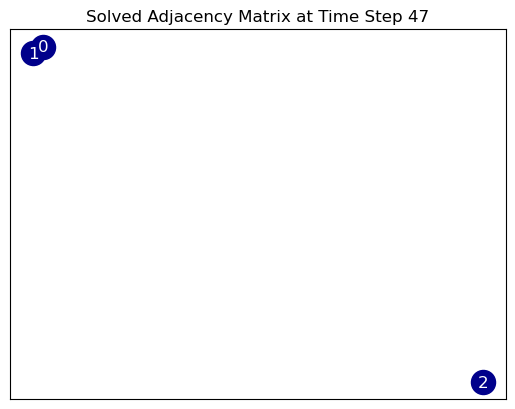

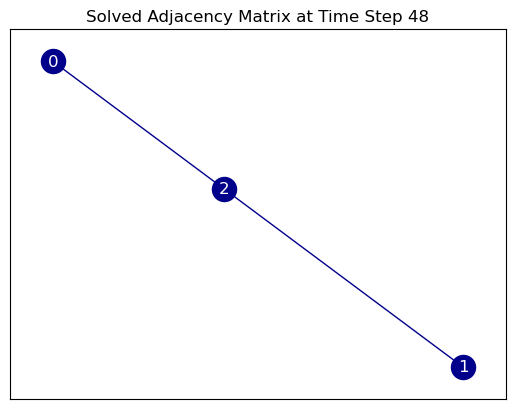

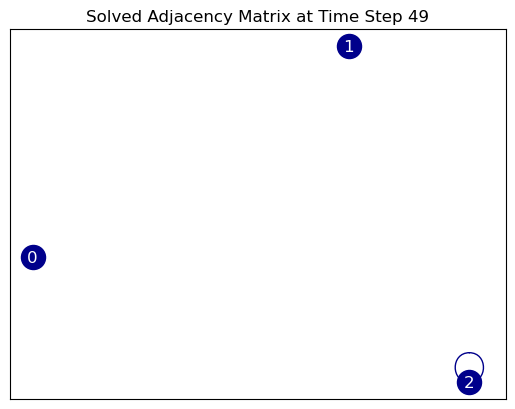

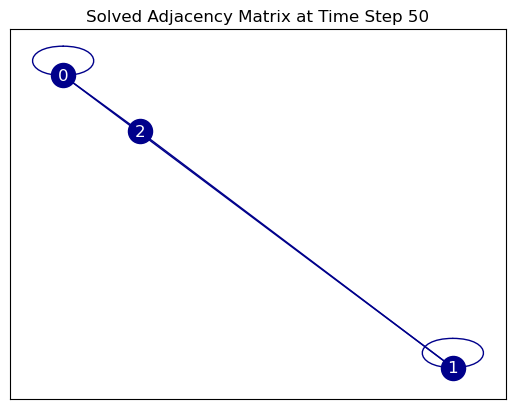

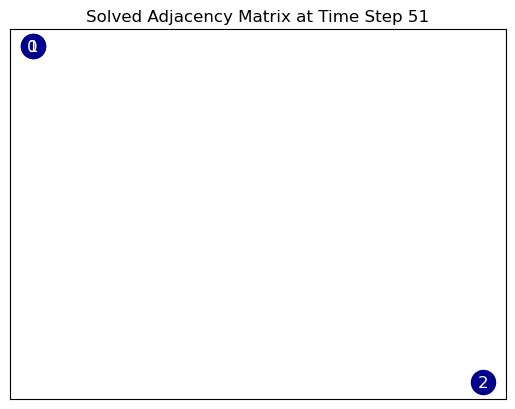

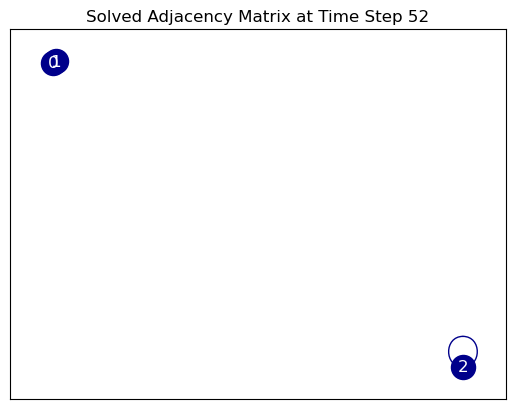

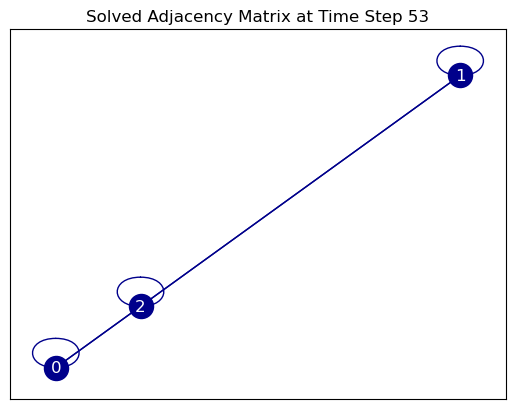

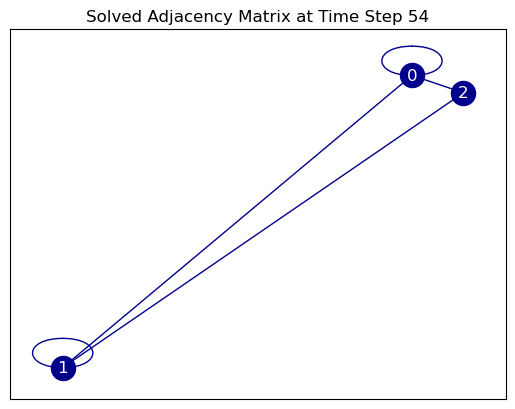

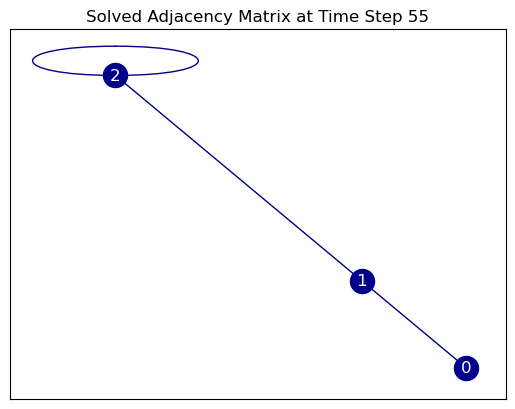

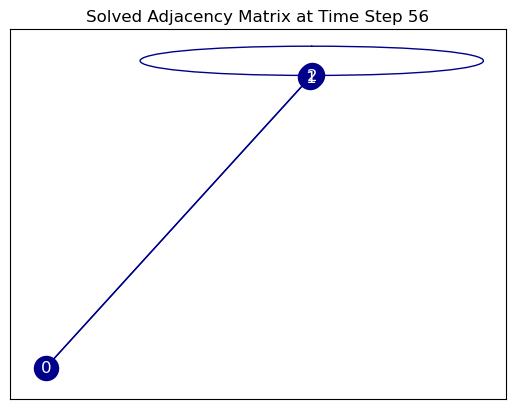

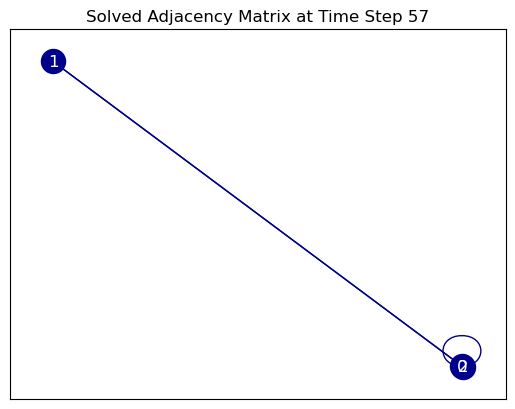

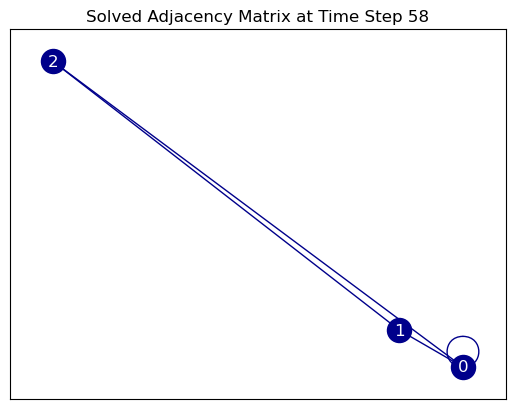

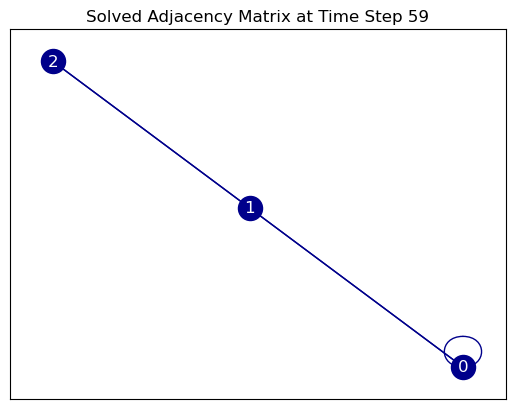

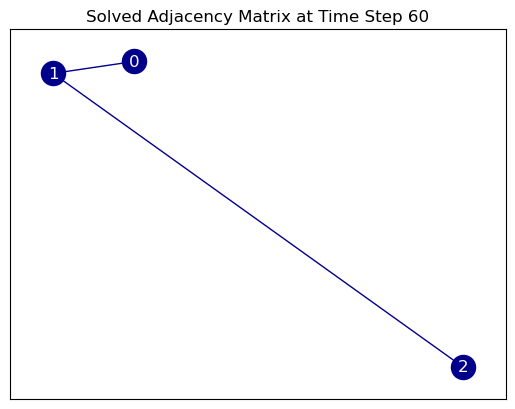

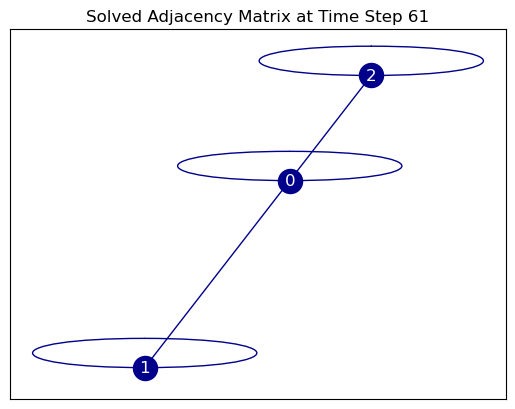

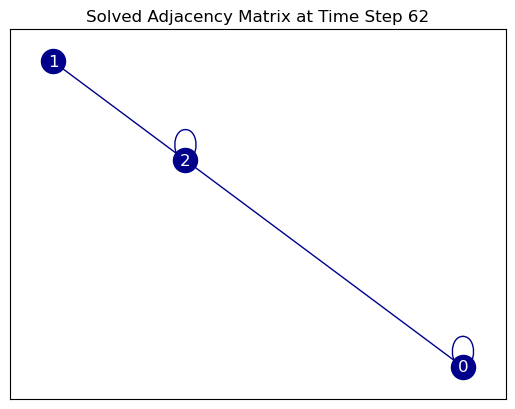

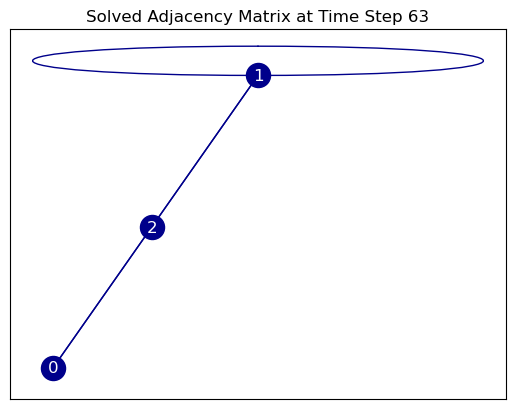

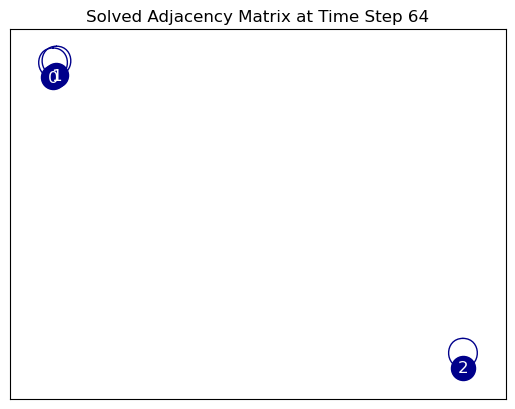

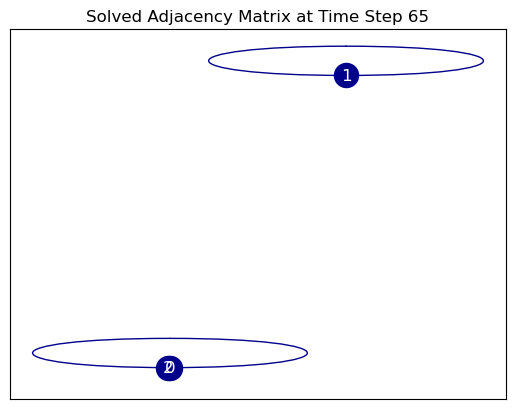

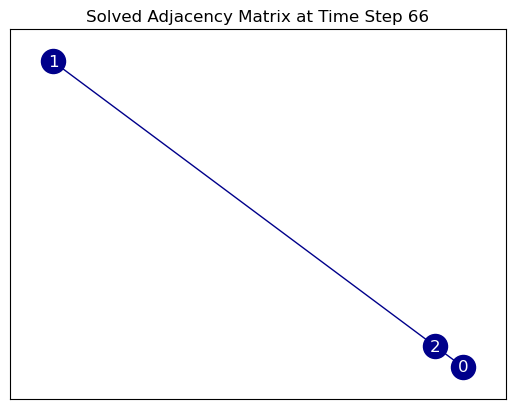

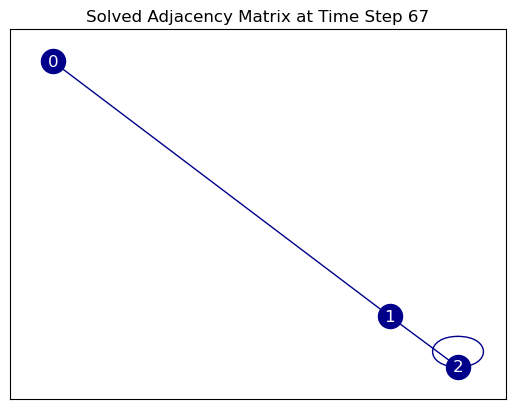

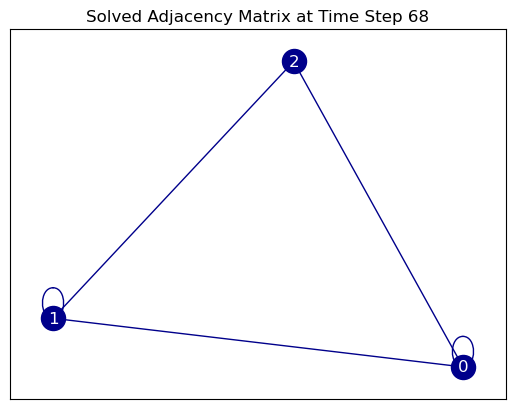

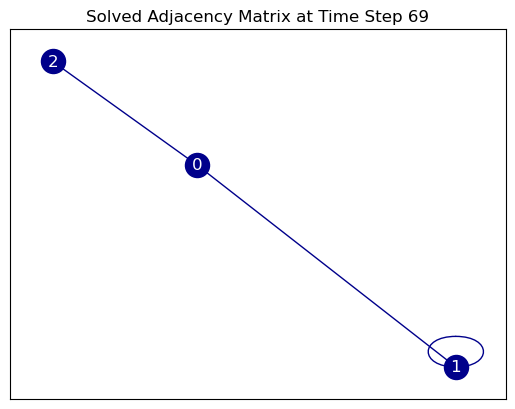

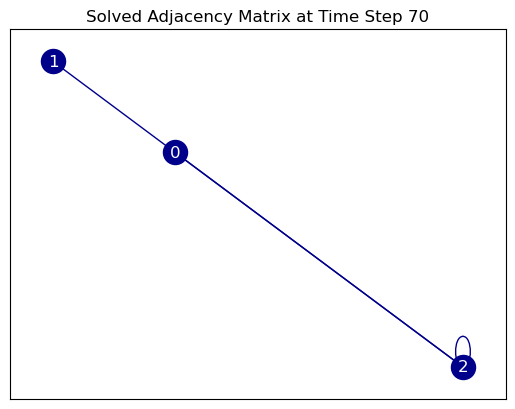

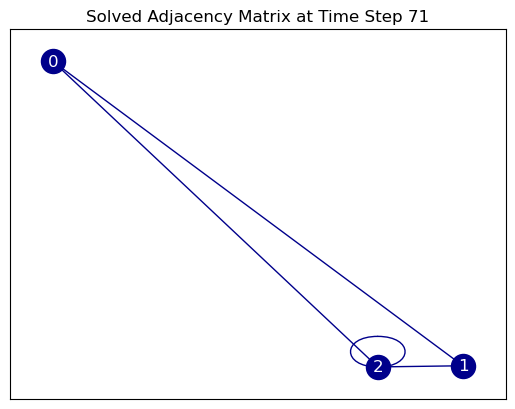

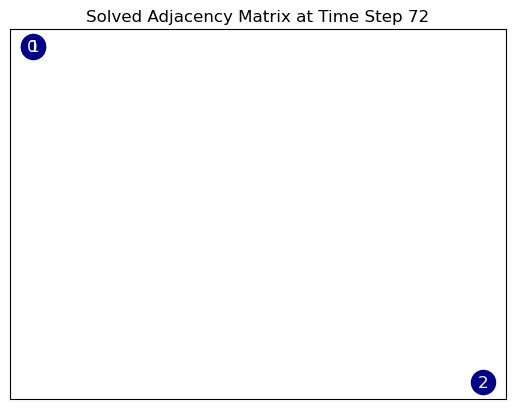

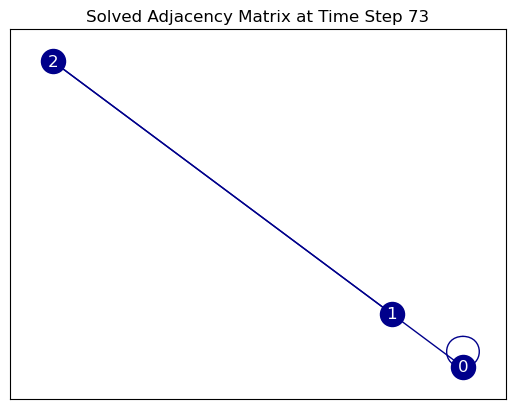

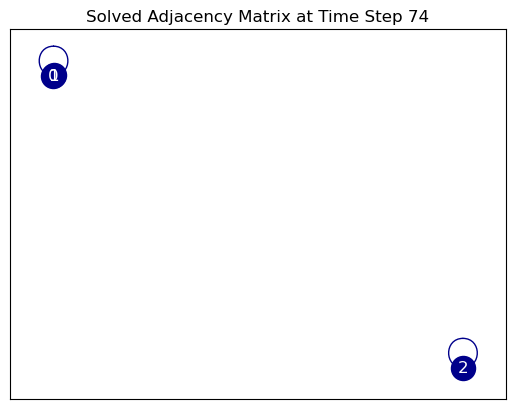

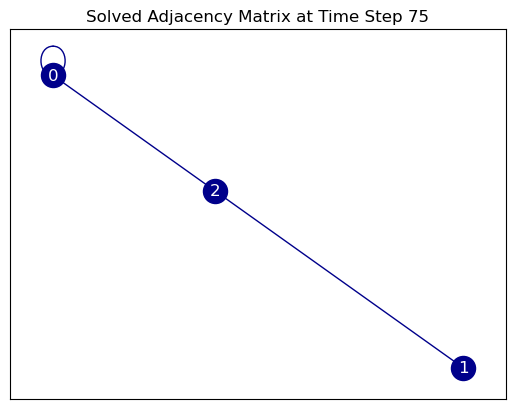

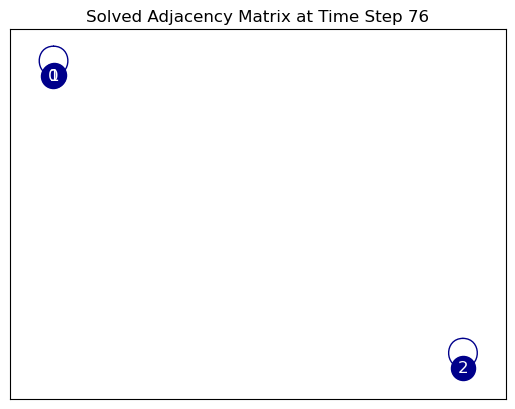

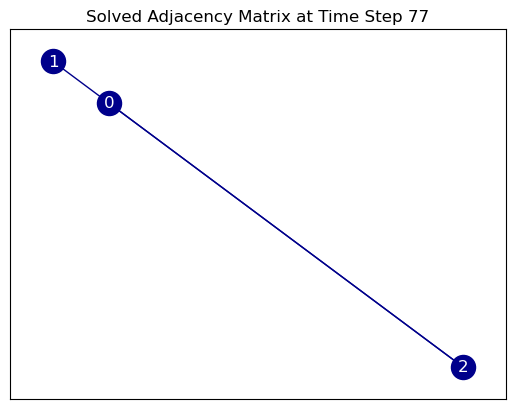

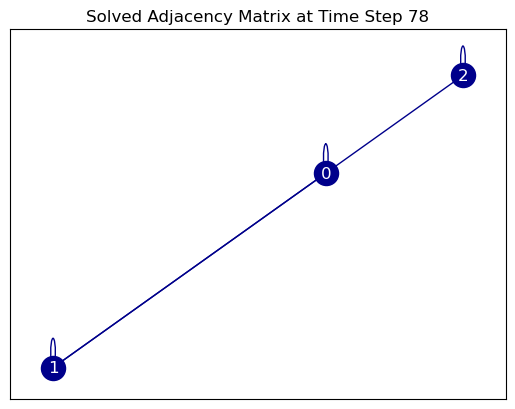

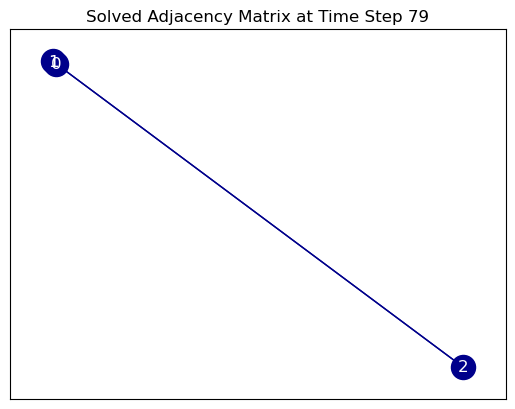

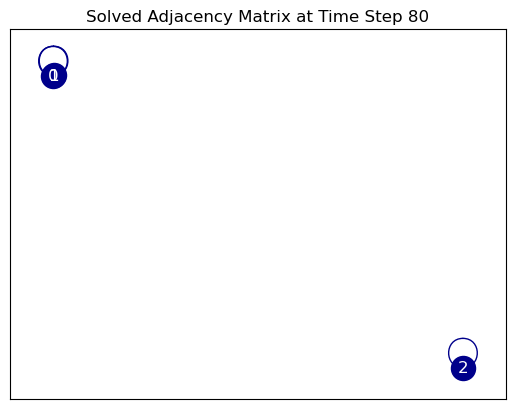

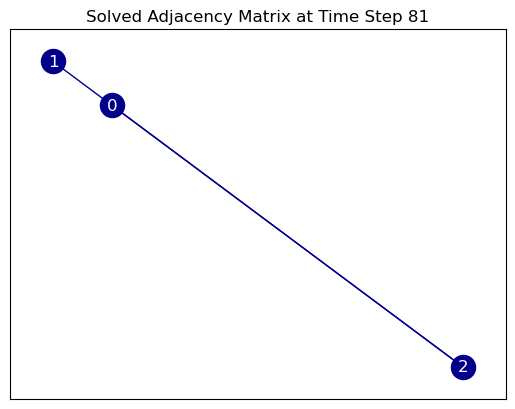

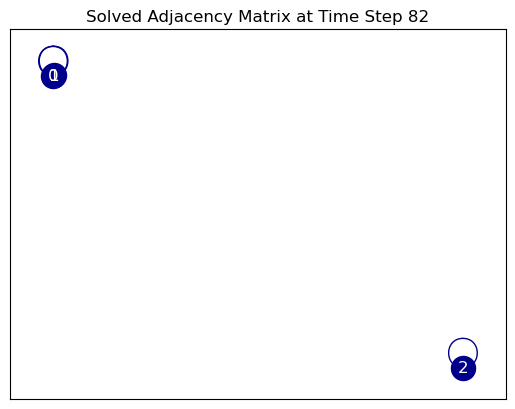

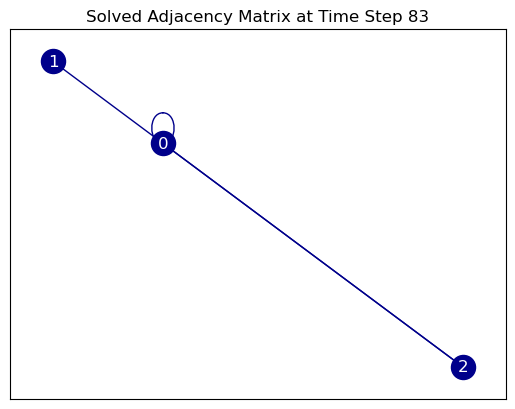

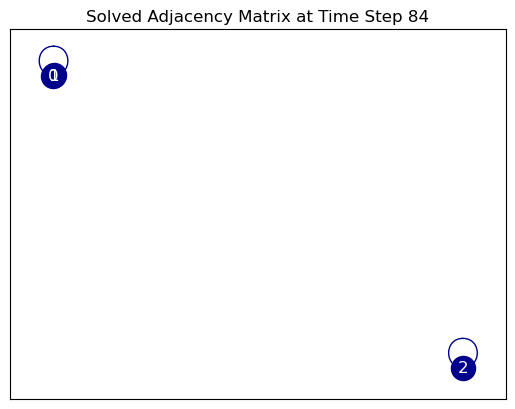

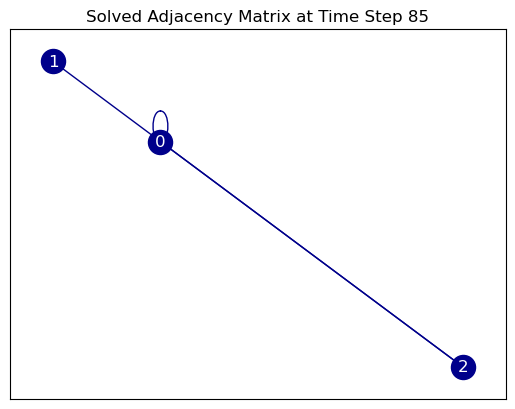

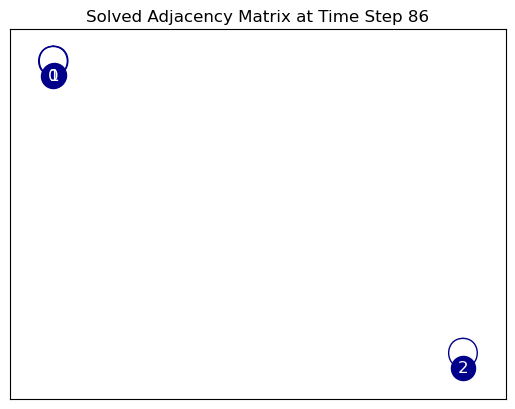

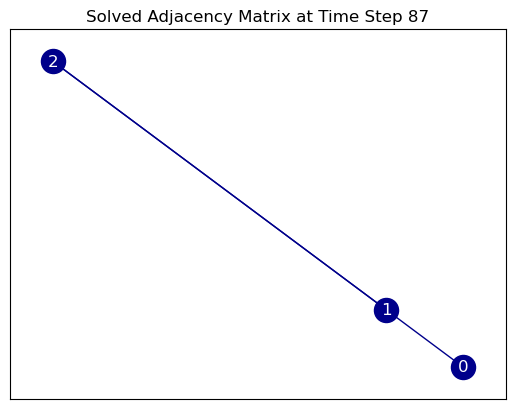

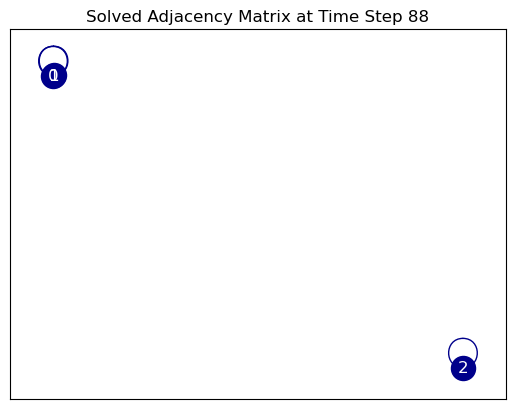

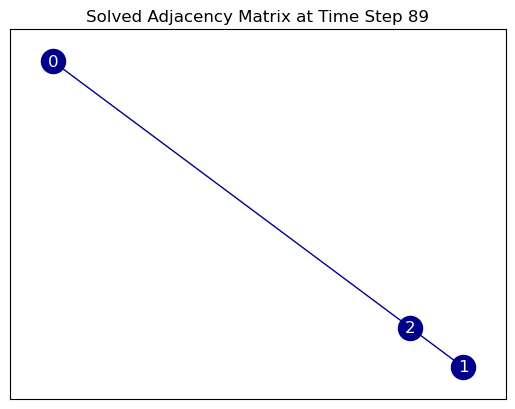

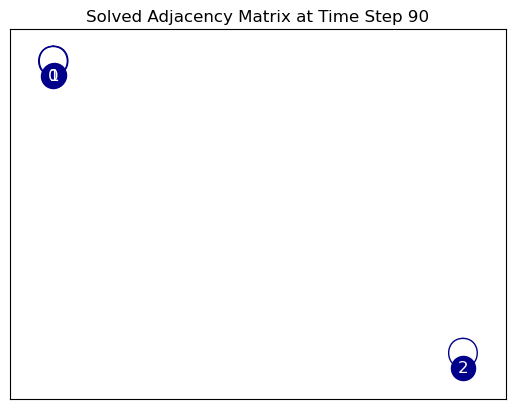

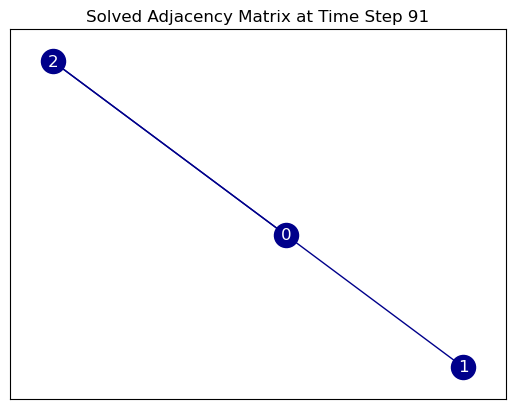

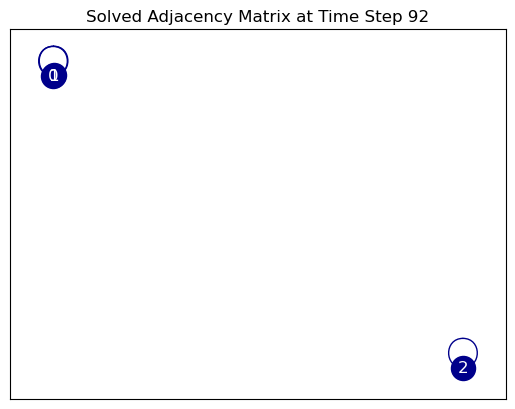

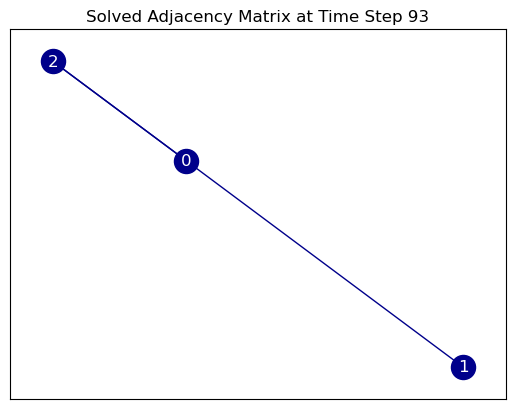

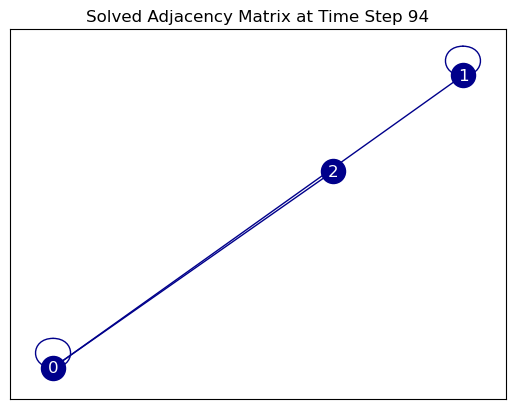

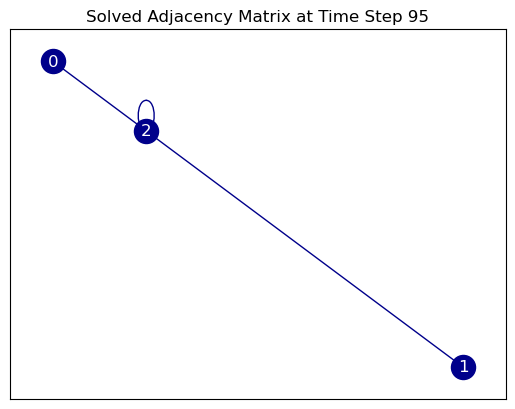

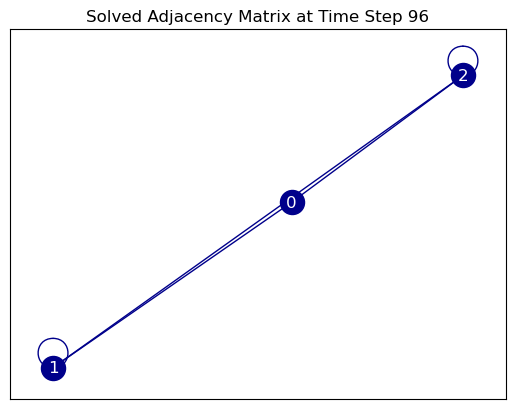

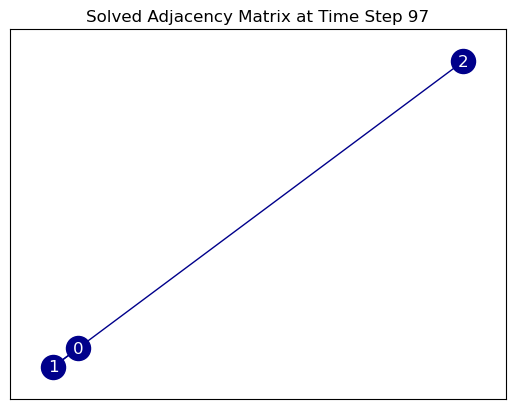

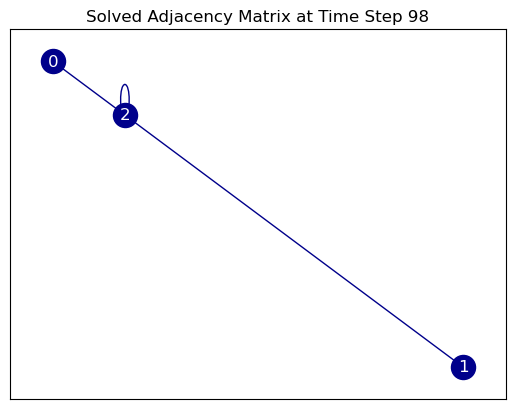

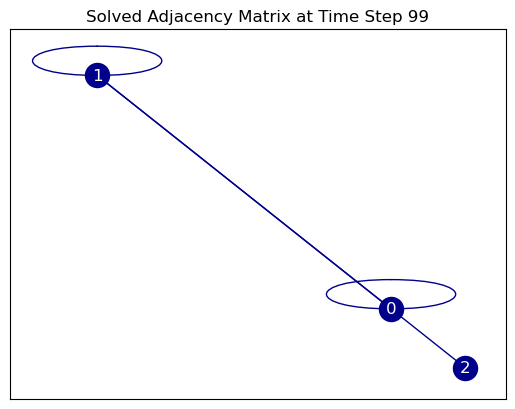

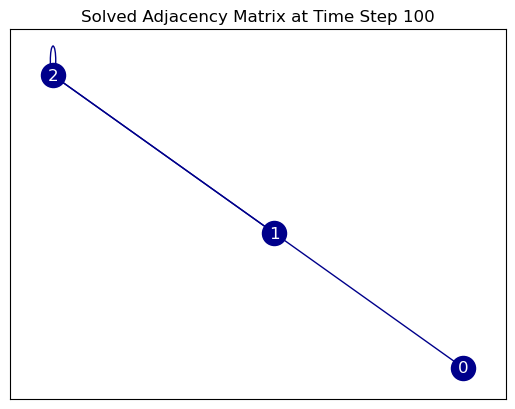

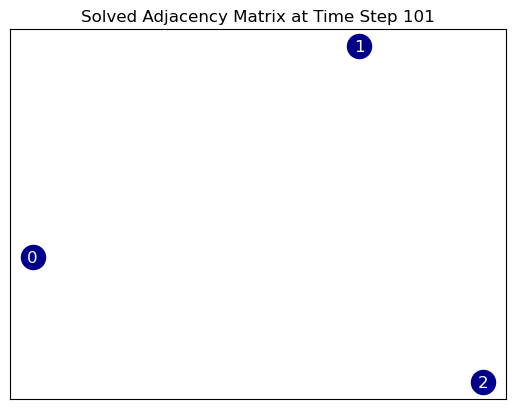

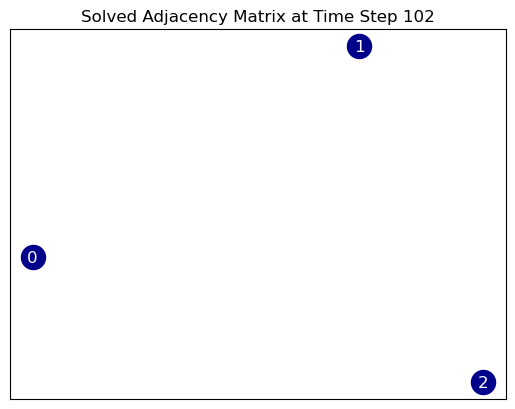

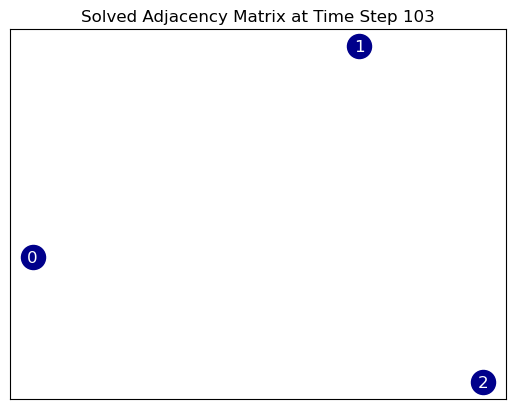

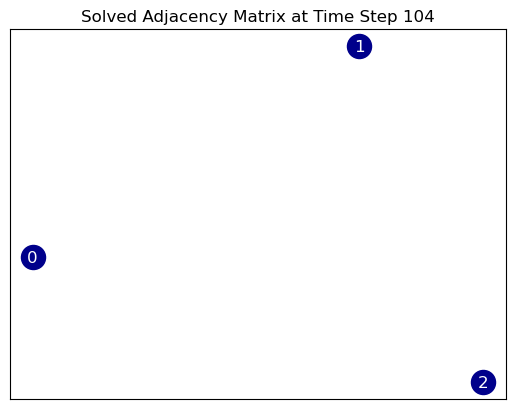

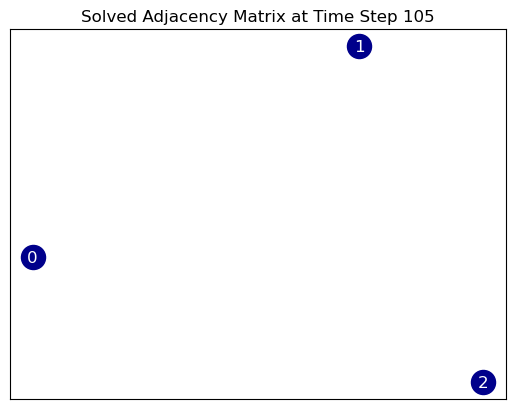

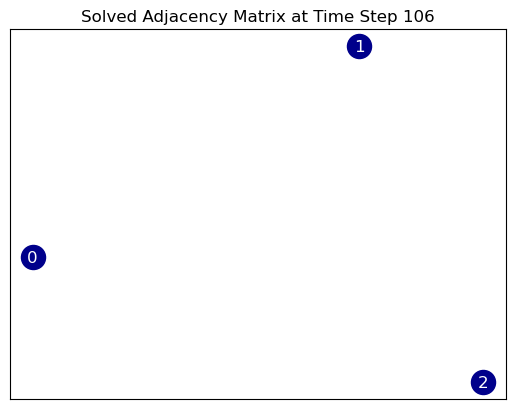

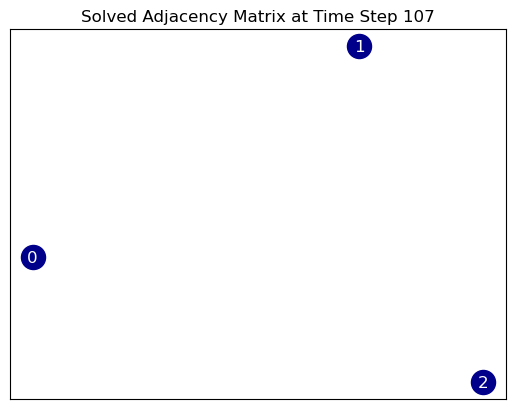

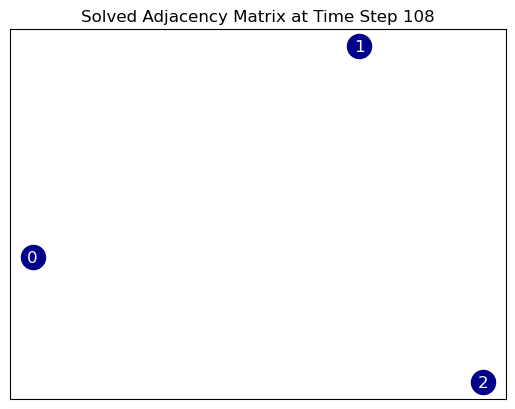

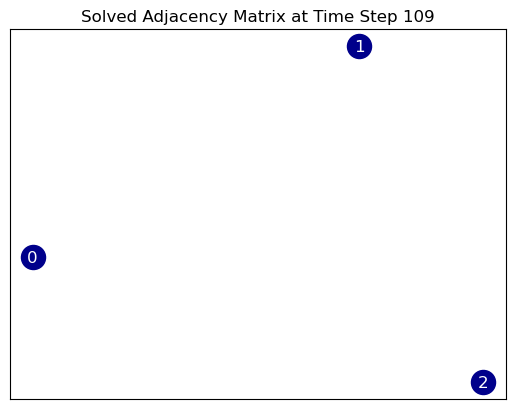

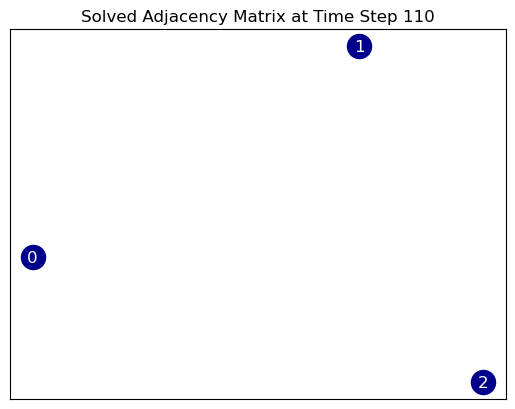

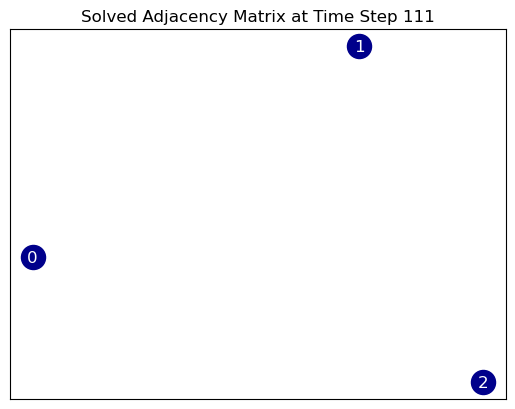

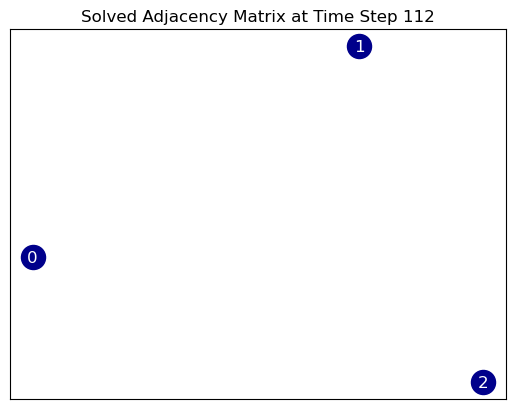

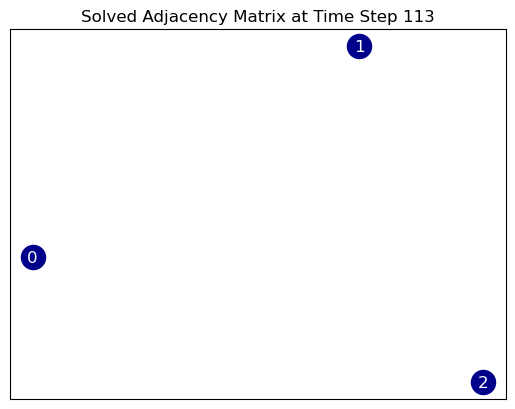

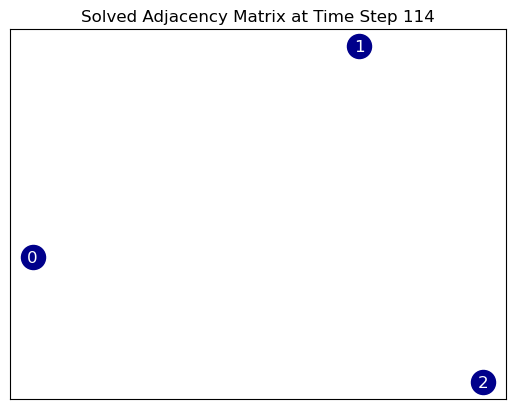

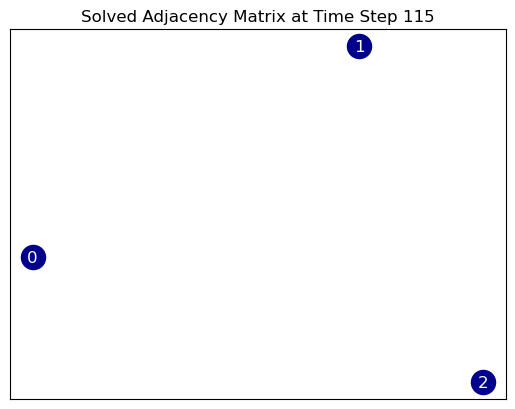

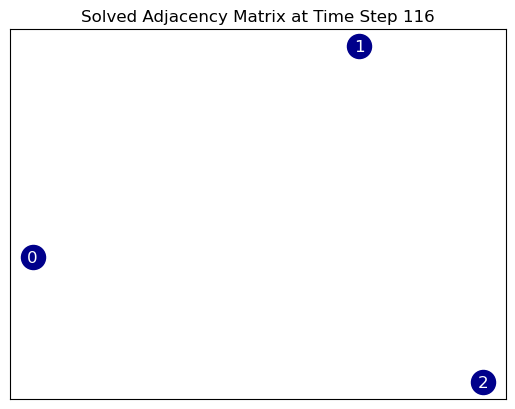

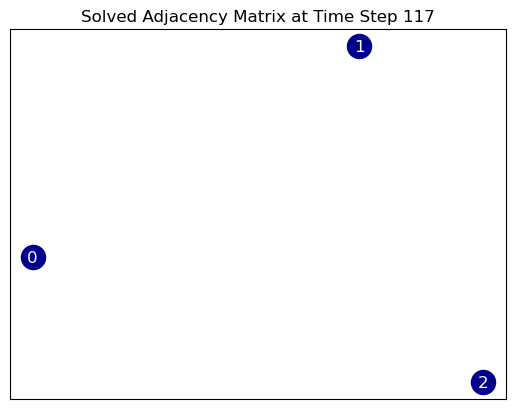

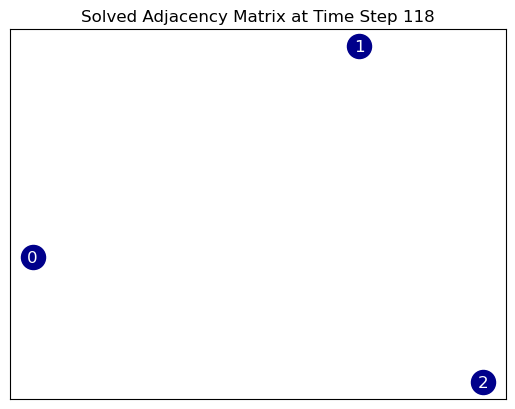

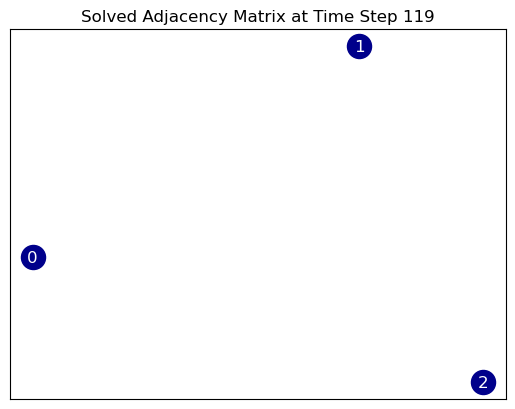

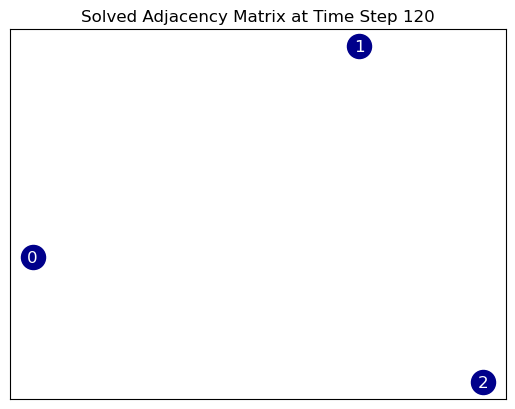

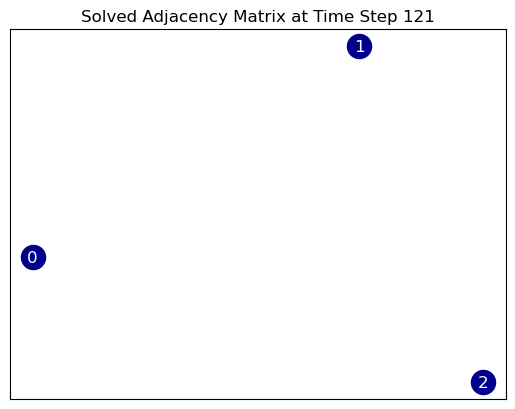

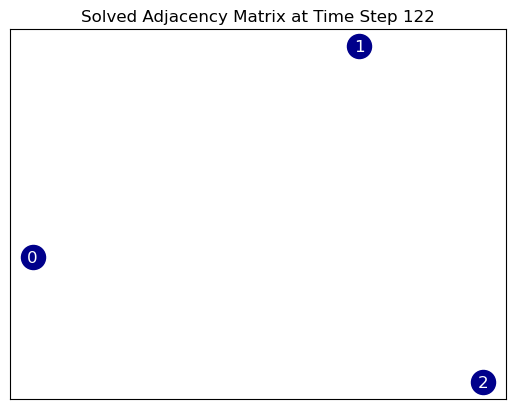

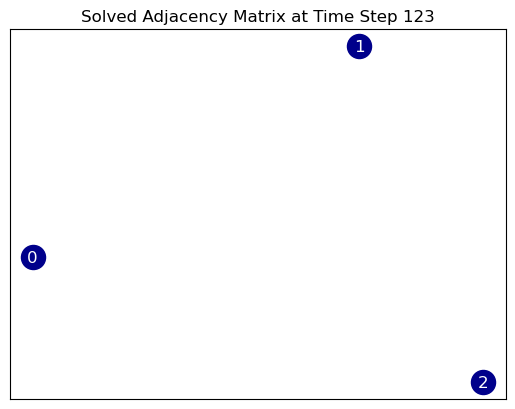

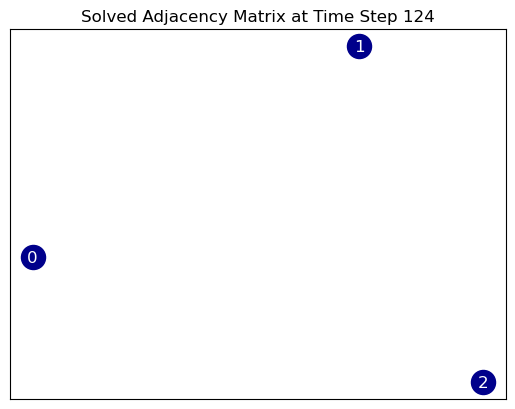

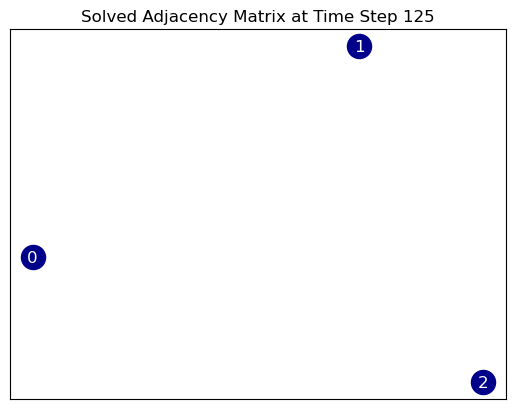

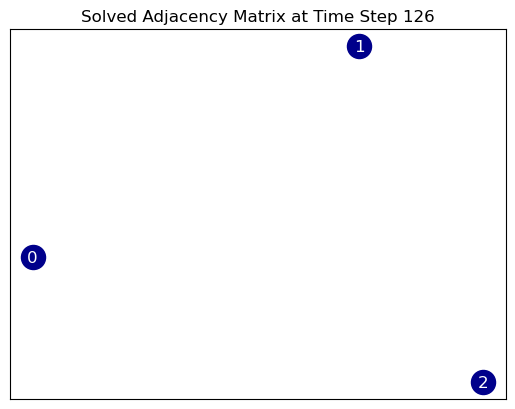

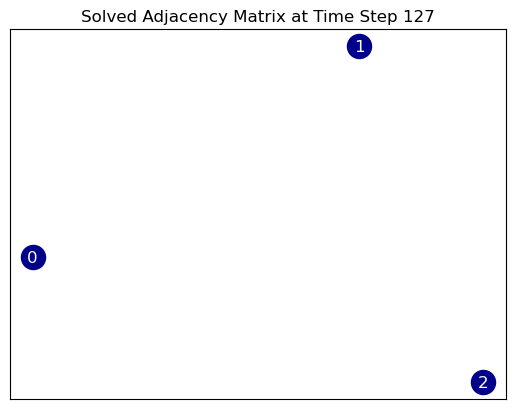

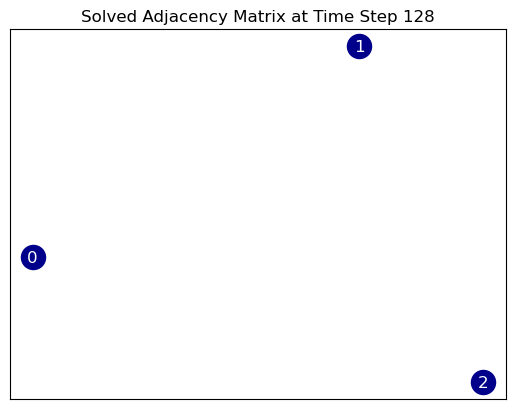

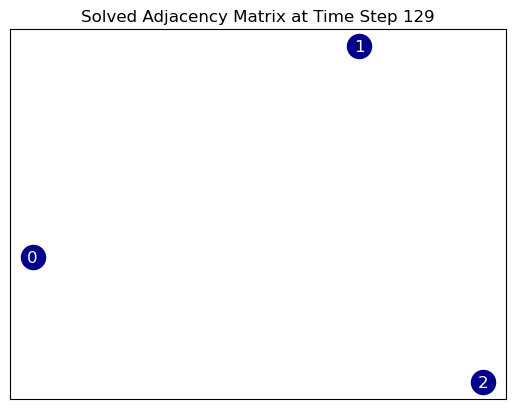

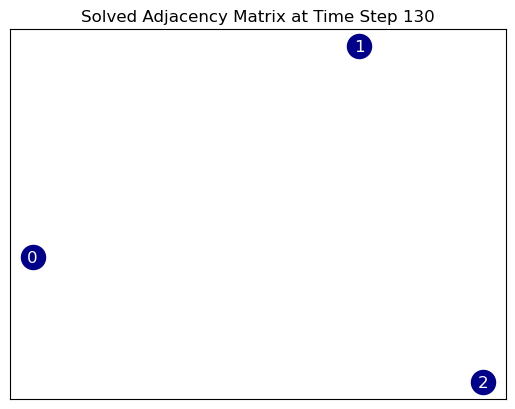

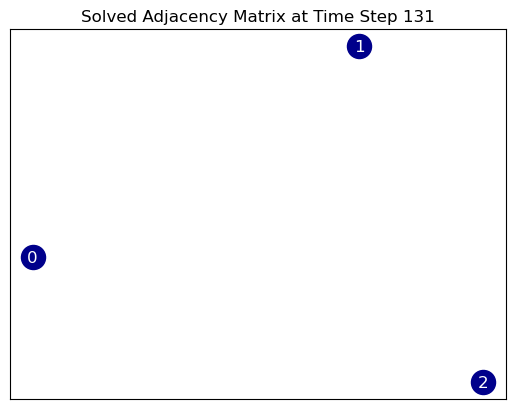

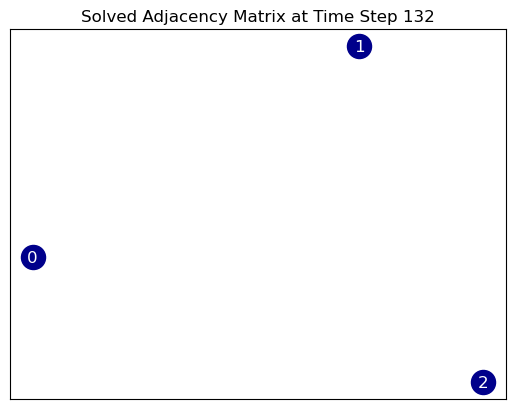

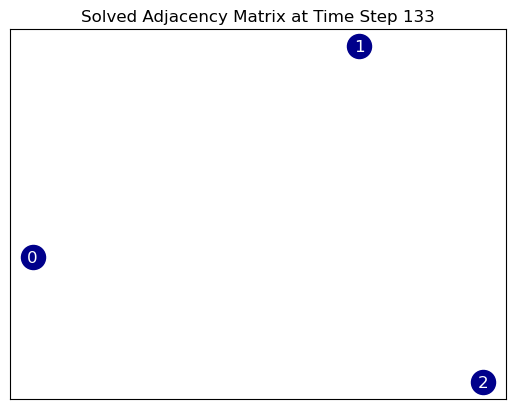

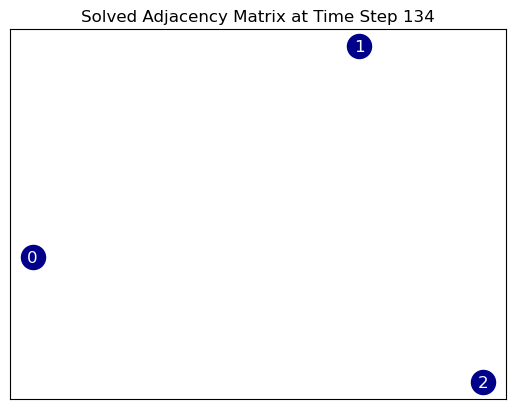

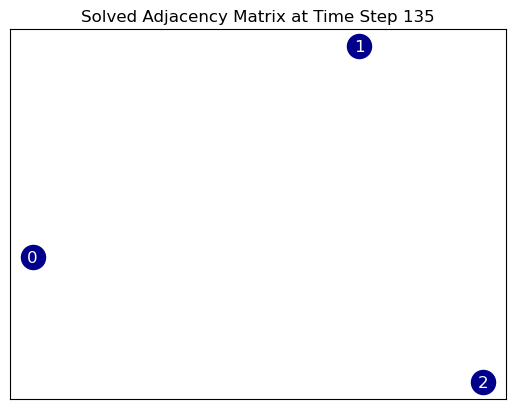

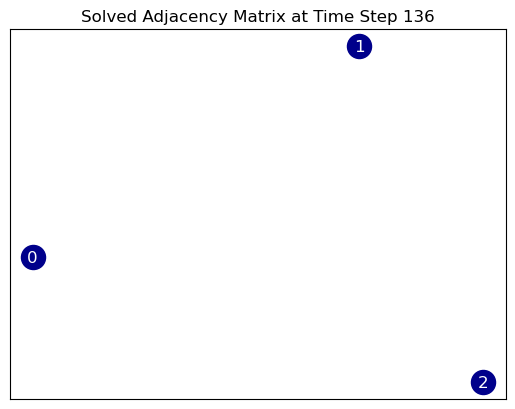

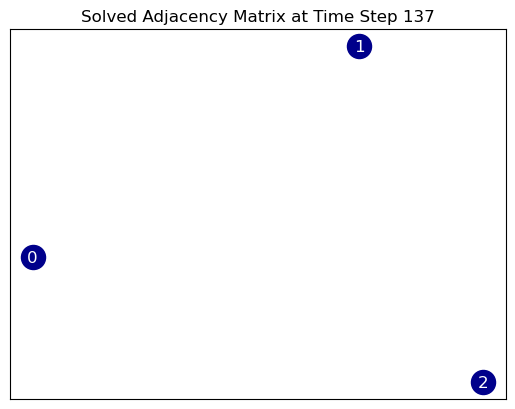

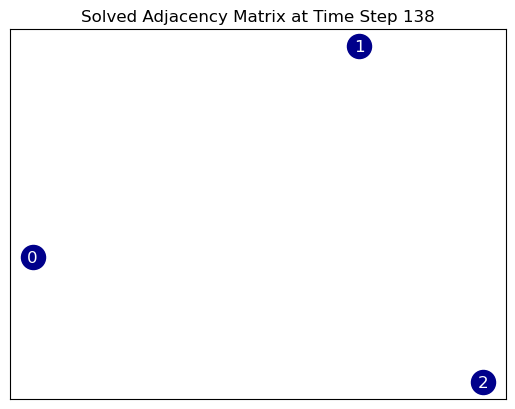

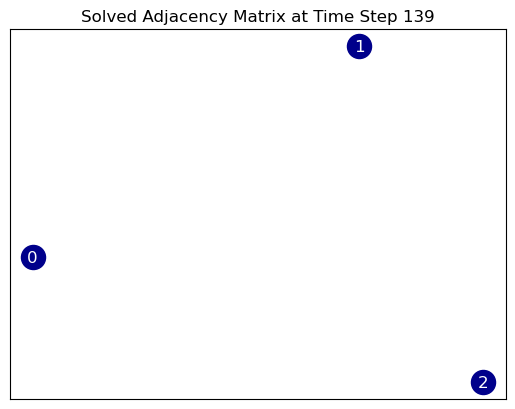

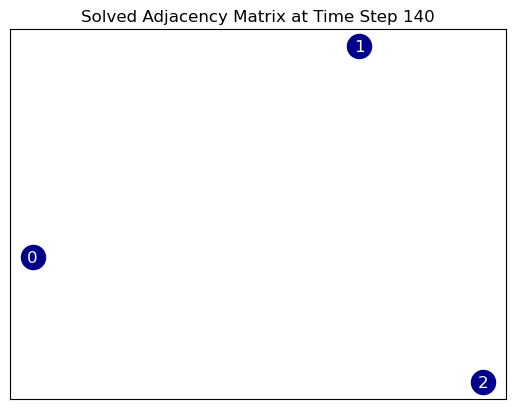

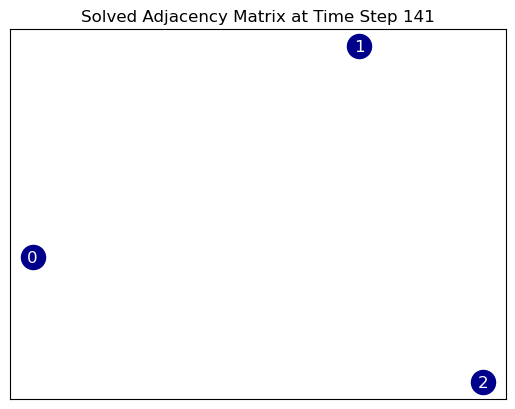

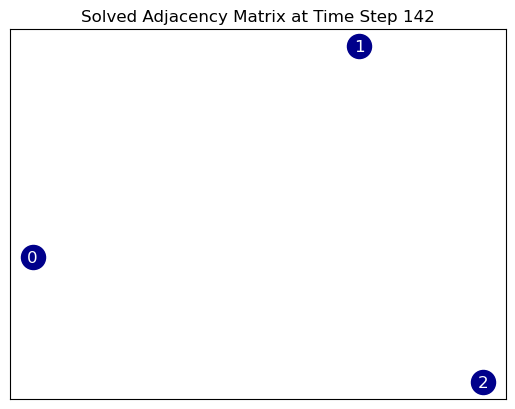

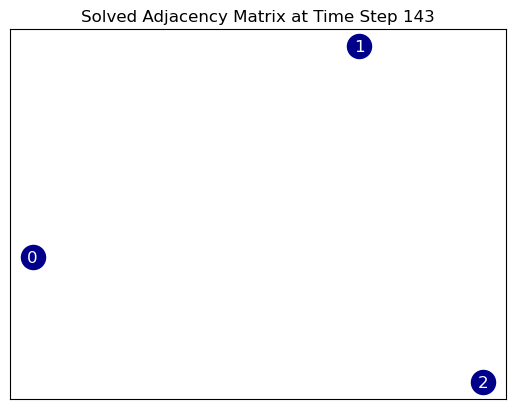

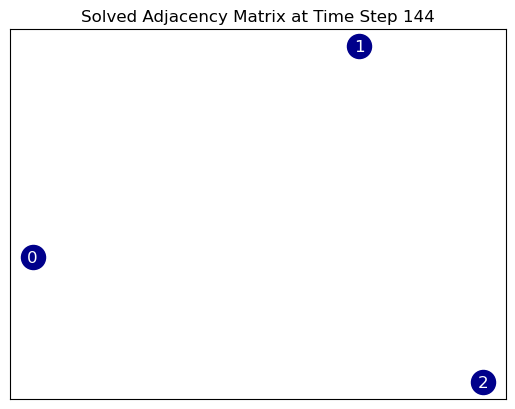

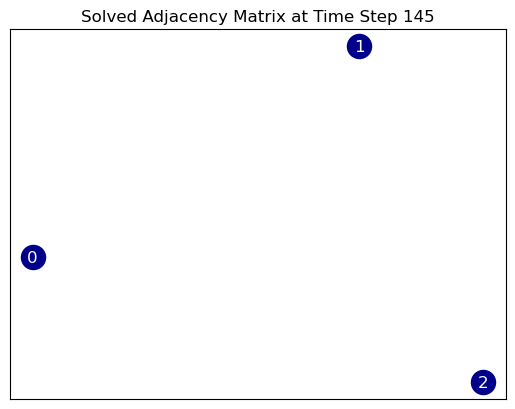

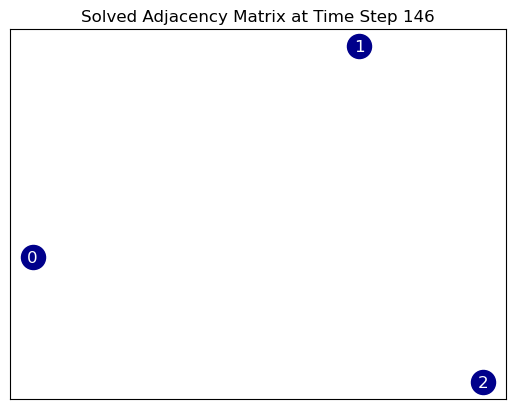

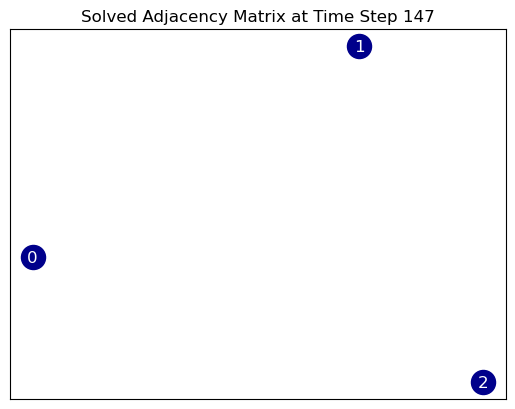

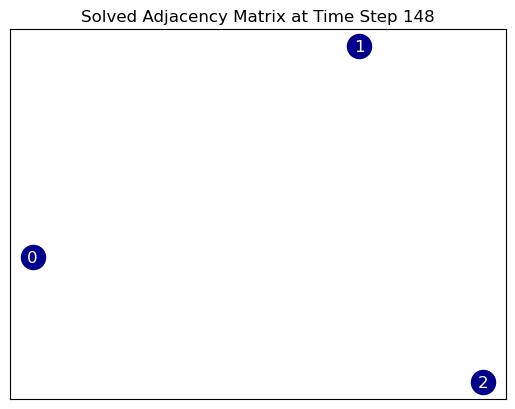

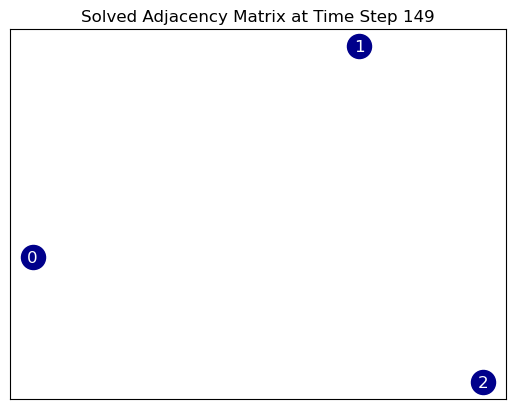

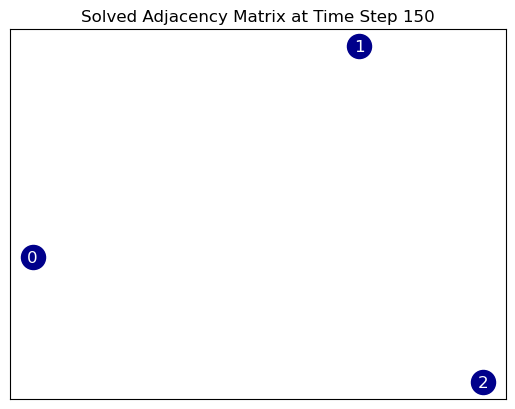

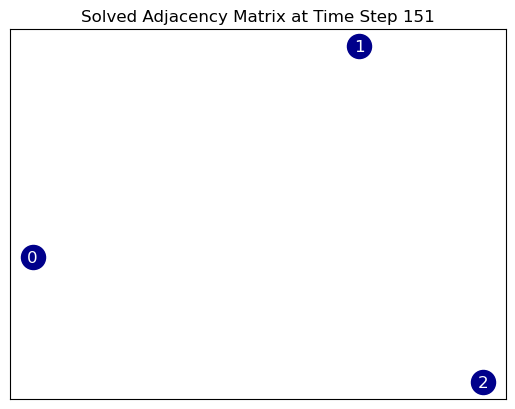

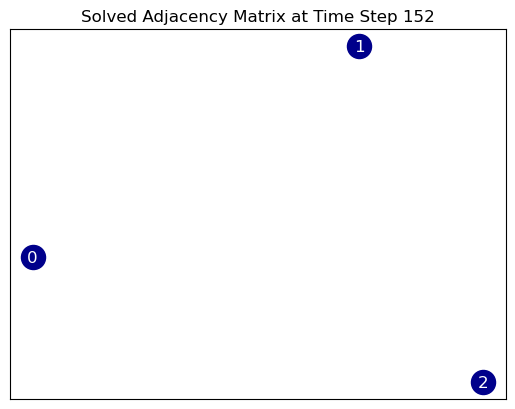

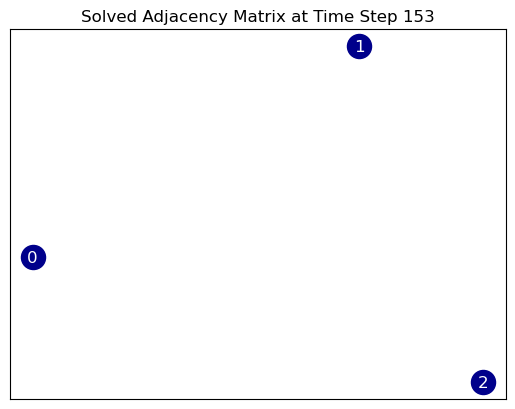

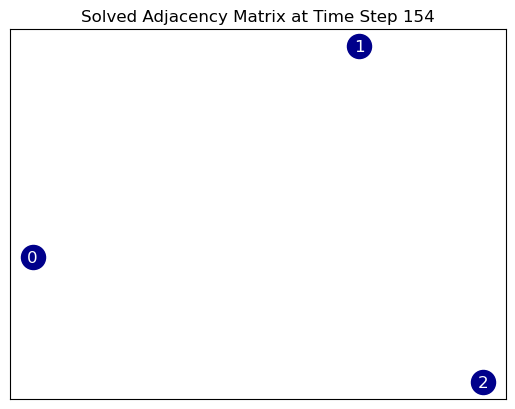

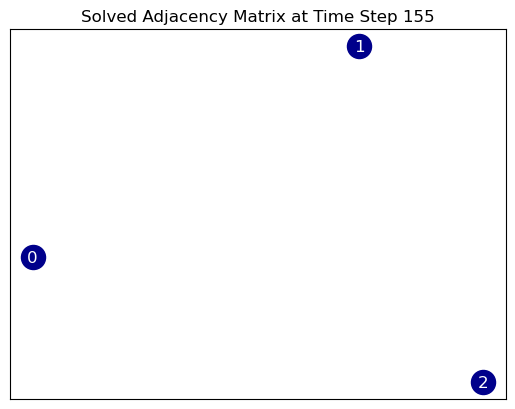

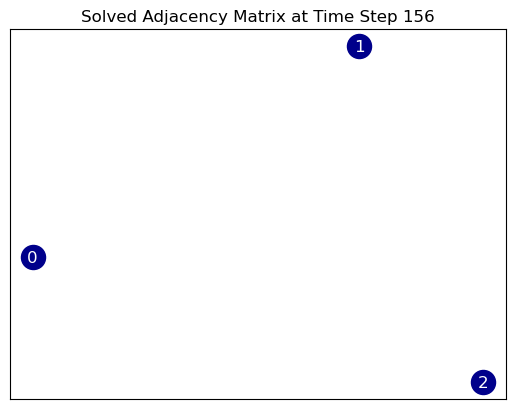

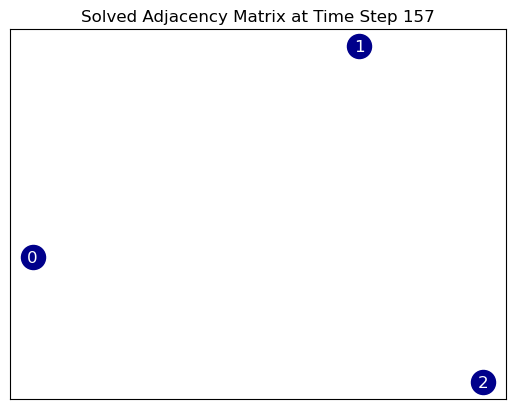

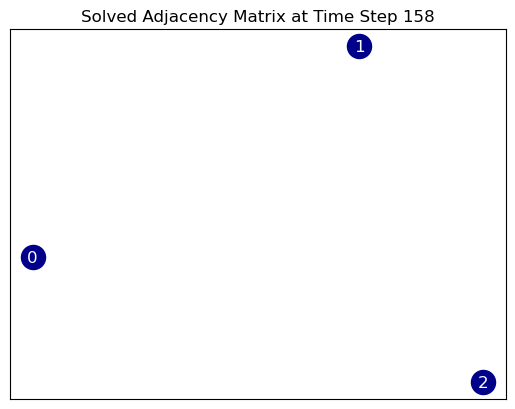

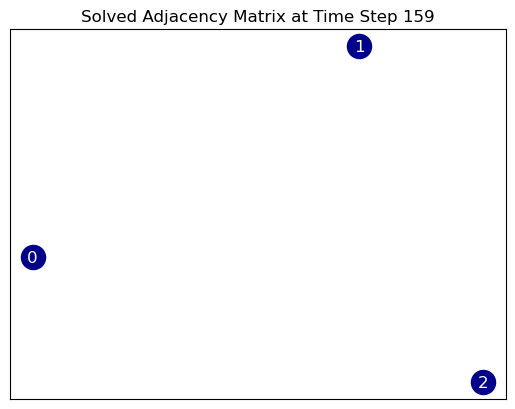

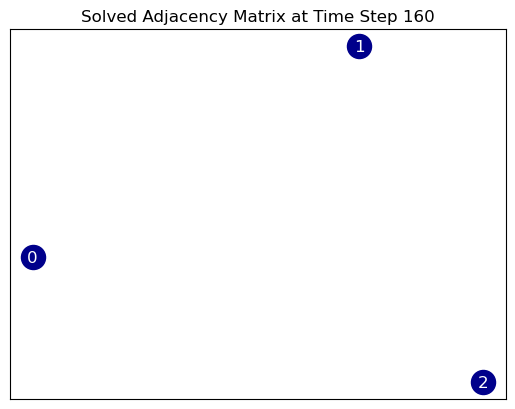

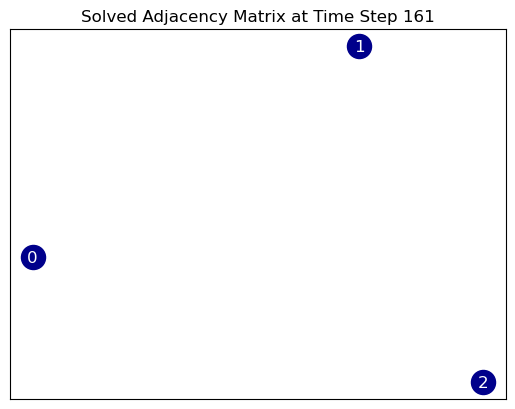

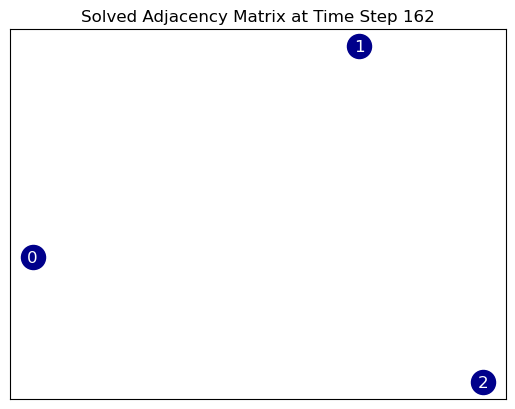

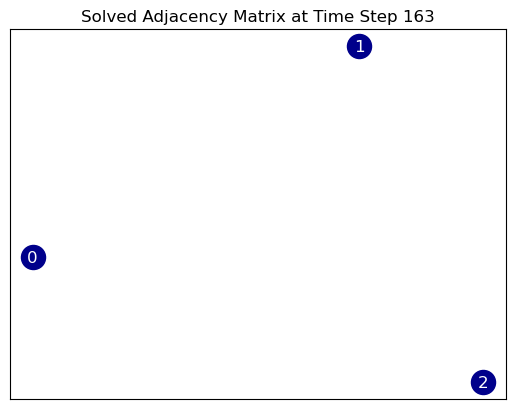

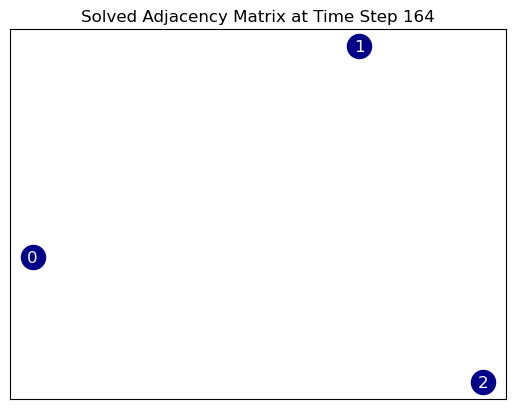

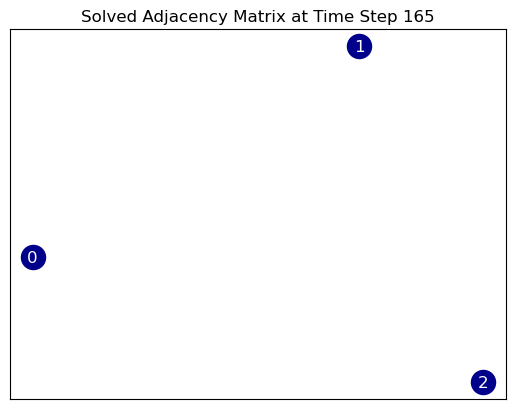

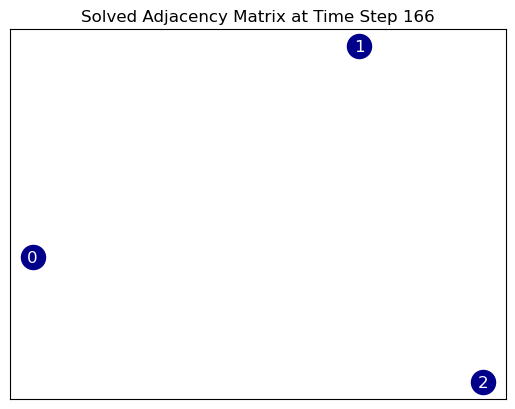

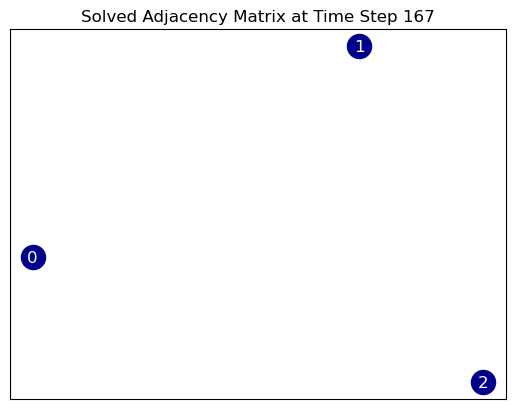

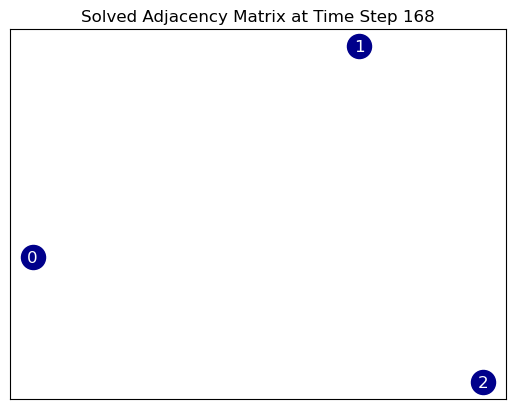

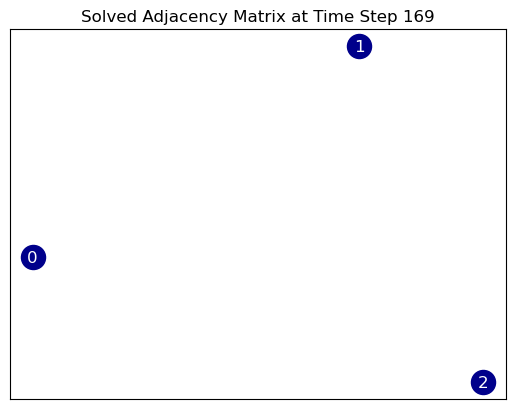

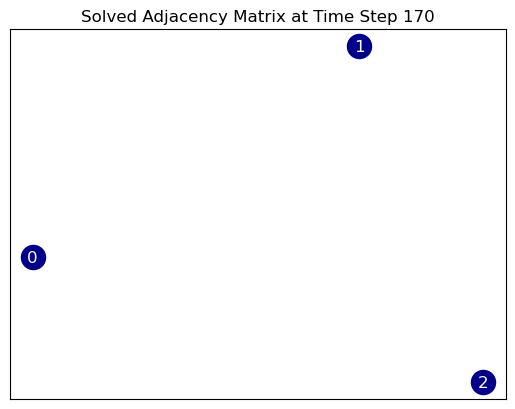

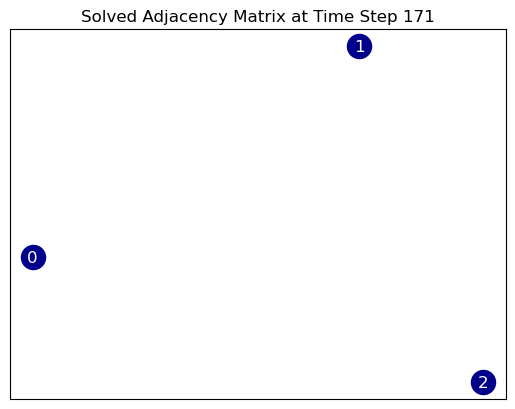

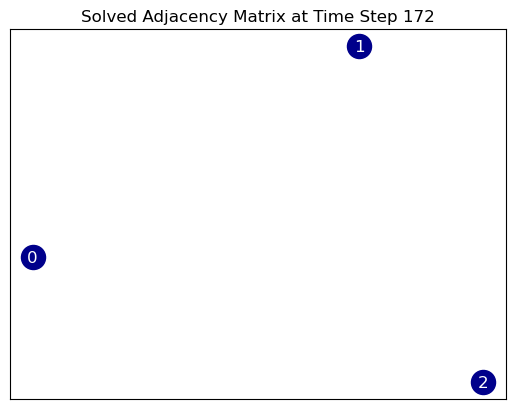

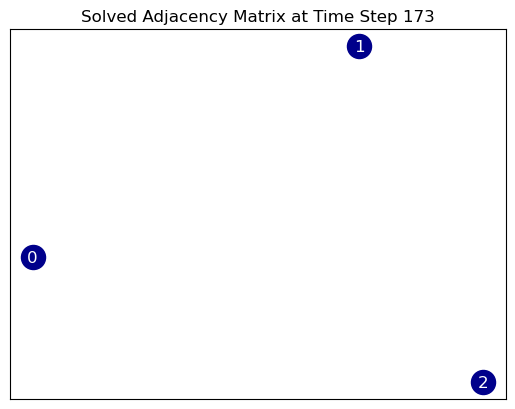

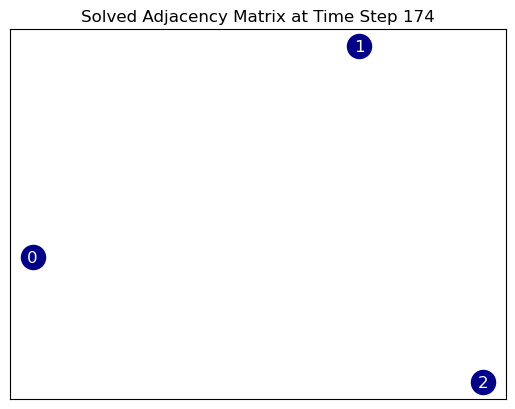

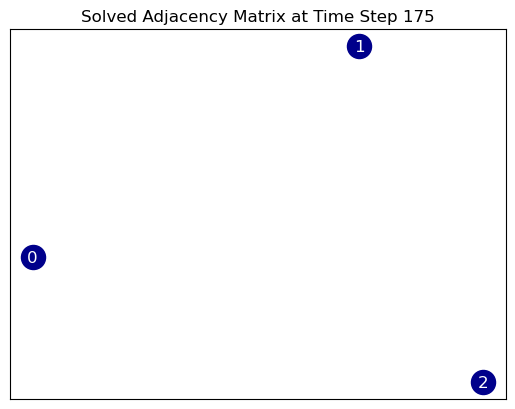

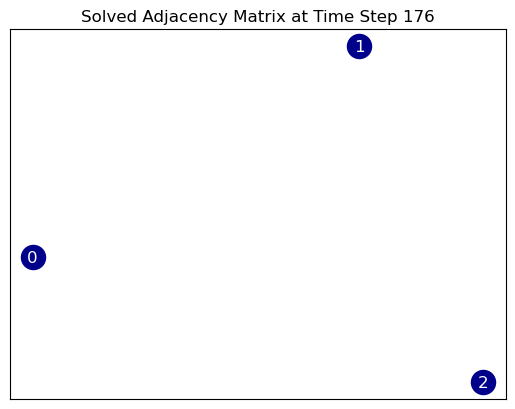

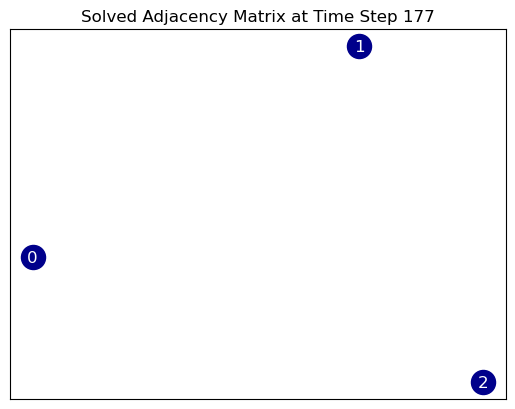

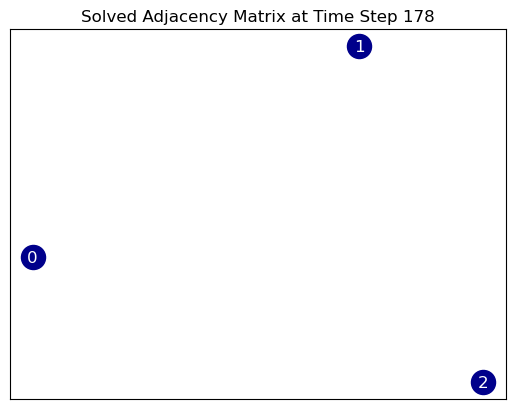

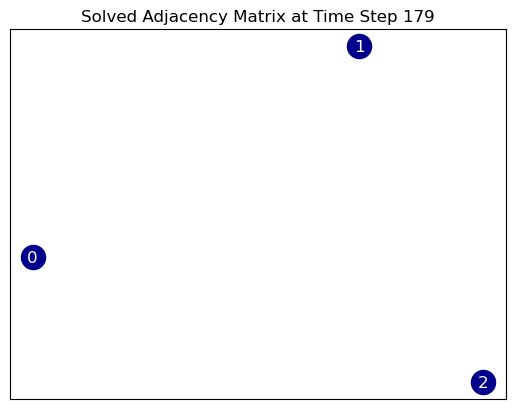

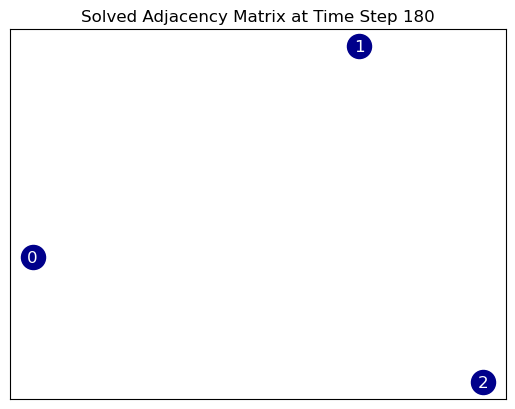

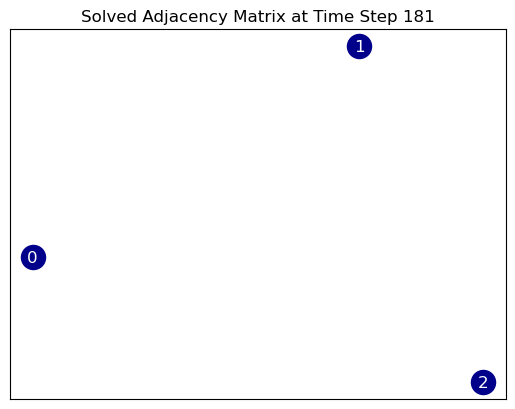

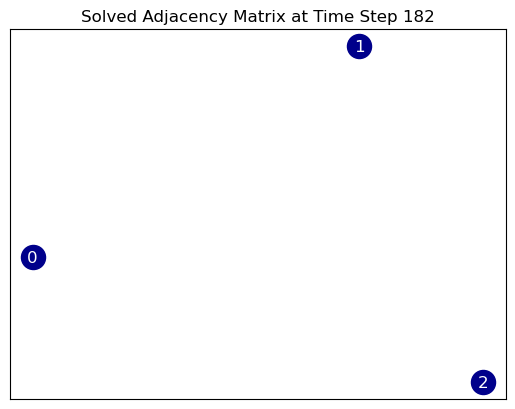

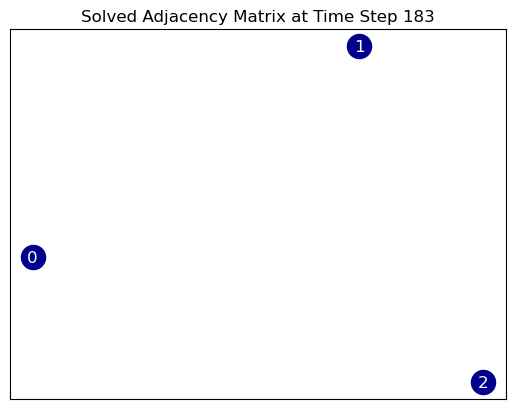

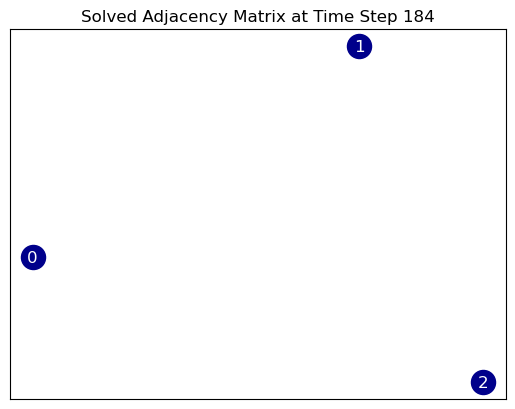

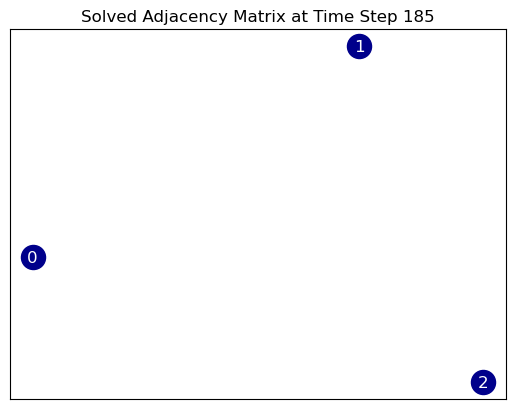

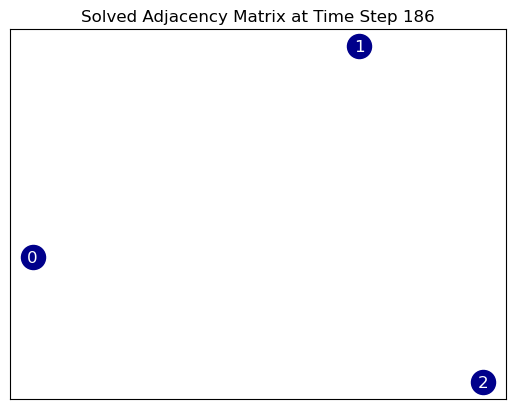

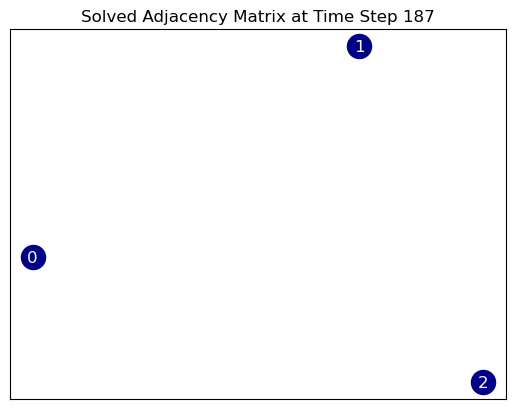

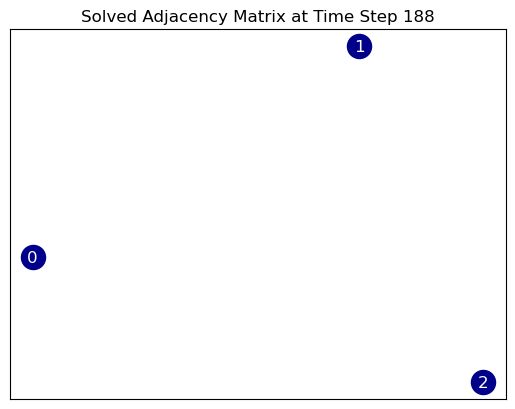

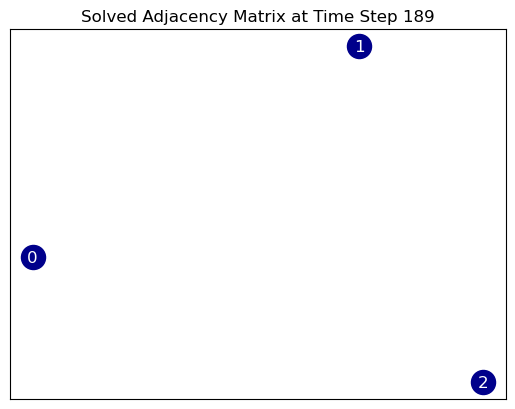

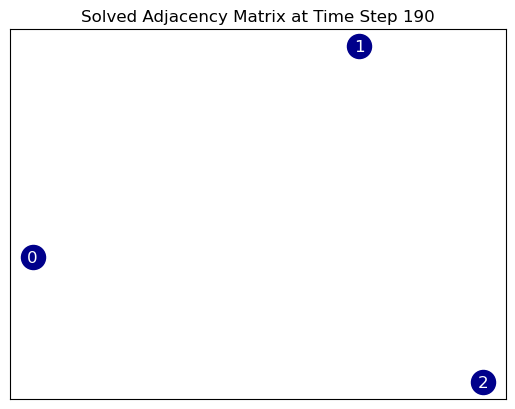

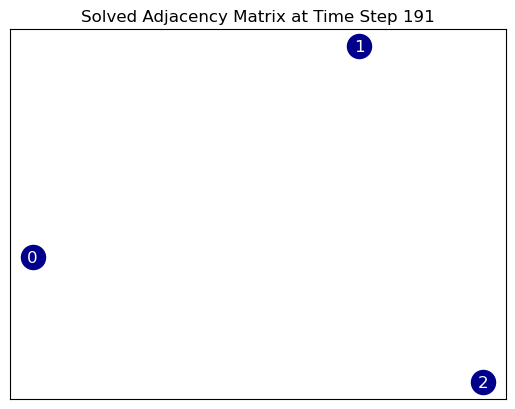

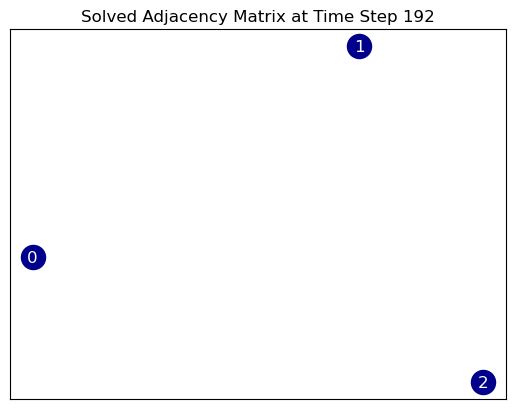

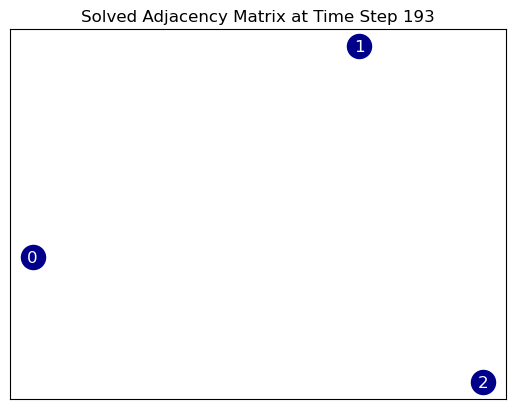

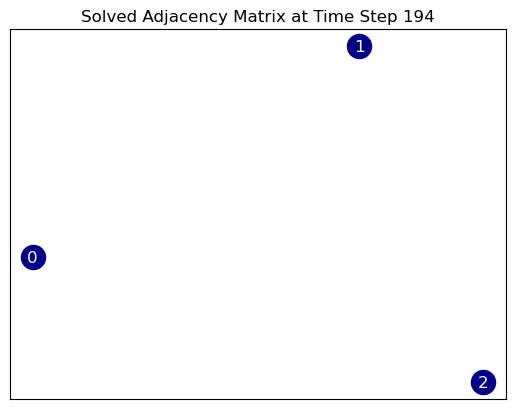

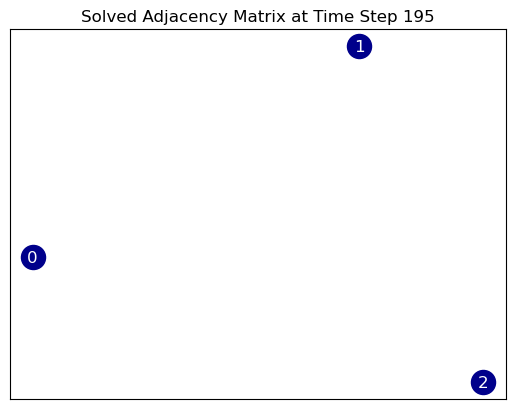

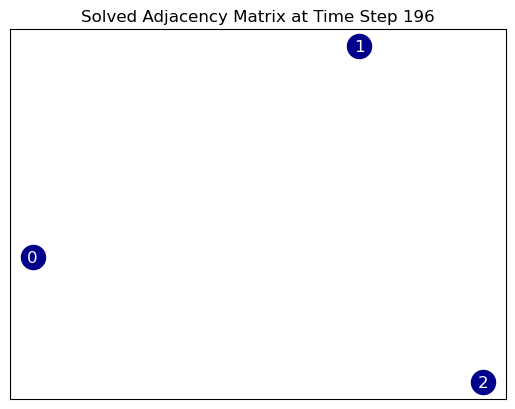

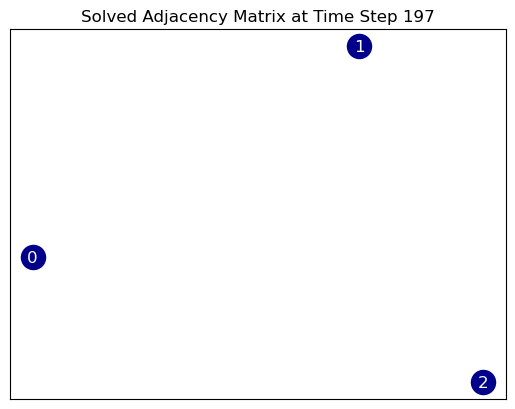

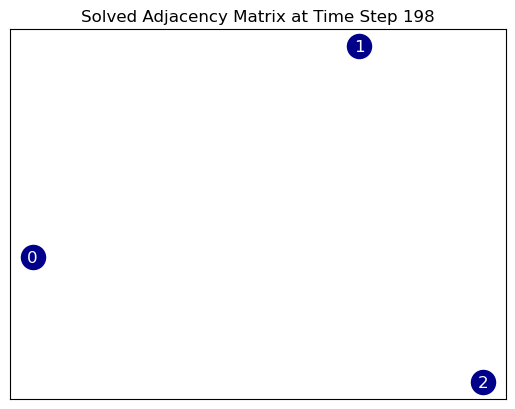

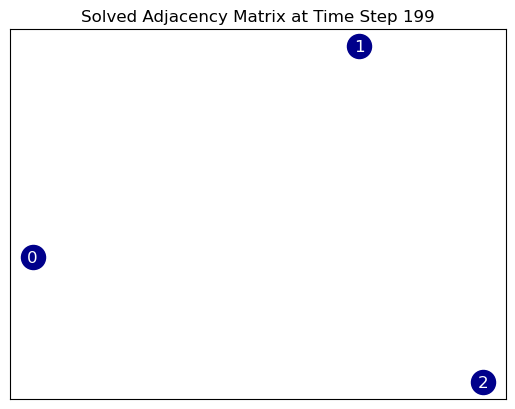

In [3]:
# Now running my algorithm to recognize graph topology

from proposed import estimate_graph_connectivity

NODES = p
SAMPLES = N

EPSILON = 1e-10
VALUE_THRESHOLD = 1e10
ALPHA = 0.9


# estimate_graph_connectivity(Y, lambda_param, alpha, Q_initial, R_initial, F_initial, H_initial, max_iter=100)

Q_initial = np.eye(NODES*NODES)
R_initial = np.eye(NODES)
F_initial = np.eye(NODES*NODES)
H_initial = np.eye(NODES*NODES)

print("Shape of sample array: ", sample.shape)

Y = sample[:NODES, :SAMPLES] # should already be of these dimensions but just to check

print("The origional graph data is")
printPretty(Y)

lambda_param = 0.0001
alpha = 0.95

# Estimate graph connectivity
A_estimated_GGLASSO_gen = estimate_graph_connectivity(Y, lambda_param, alpha, Q_initial, R_initial, F_initial, H_initial)

# Compare it with true adjacency from SEM
print("Solved Adjacency Matrix from SEM")
for i in range(SAMPLES):
    print(f"Time Step {i}")
    printPretty(A_estimated_GGLASSO_gen[:, :, i])

# If the value in the adjacency matrix is less than 0.05, set to 0
A_estimated_GGLASSO_gen[A_estimated_GGLASSO_gen < 0.05] = 0

# Plot all solved adjacency matrices in graph form and compare them to the original version
for i in range(3, SAMPLES):
    G_estimated = nx.from_numpy_array(A_estimated_GGLASSO_gen[:, :, i])
    pos_estimated = nx.drawing.layout.spring_layout(G_estimated, seed=1234)
    
    plt.figure()
    nx.draw_networkx(G_estimated, pos=pos_estimated, node_color="darkblue", edge_color="darkblue", font_color='white', with_labels=True)
    plt.title(f"Solved Adjacency Matrix at Time Step {i}")
    plt.show()




